In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (15, 10)

import seaborn as sns
sns.set()

from statsmodels.tsa.seasonal import seasonal_decompose

from utils import get_data

In [133]:
df_merge, df = get_data('./data')

df_temp = pd.read_json("./data/temperature_brescia.json", orient = 'index')
df_temp.index = pd.to_datetime(df_temp.index)
df_temp = df_temp.resample("H").last().fillna(method="ffill")
df_temp.columns = ["temp_min", "temp_max"]

df_merge = df_temp.merge(df_merge, how='outer', left_index=True, right_index=True)

In [90]:
df_merge

temp_min  temp_max  \
2014-01-01 00:00:00       1.0       7.0   
2014-01-01 01:00:00       1.0       7.0   
2014-01-01 02:00:00       1.0       7.0   
2014-01-01 03:00:00       1.0       7.0   
2014-01-01 04:00:00       1.0       7.0   
...                       ...       ...   
2021-12-05 19:00:00       NaN       NaN   
2021-12-05 20:00:00       NaN       NaN   
2021-12-05 21:00:00       NaN       NaN   
2021-12-05 22:00:00       NaN       NaN   
2021-12-05 23:00:00       NaN       NaN   

                     radiazione(W/m2) (consuntivo_radiazione)  \
2014-01-01 00:00:00                                       NaN   
2014-01-01 01:00:00                                       NaN   
2014-01-01 02:00:00                                       NaN   
2014-01-01 03:00:00                                       NaN   
2014-01-01 04:00:00                                       NaN   
...                                                       ...   
2021-12-05 19:00:00                                       NaN   
2021-12-05 20:00:00                                       NaN   
2021-12-05 21:00:00                                       NaN   
2021-12-05 22:00:00                                       NaN   
2021-12-05 23:00:00                                       NaN   

                     total_load_value (domanda_elettrica)  \
2014-01-01 00:00:00                                   NaN   
2014-01-01 01:00:00                                   NaN   
2014-01-01 02:00:00                                   NaN   
2014-01-01 03:00:00                                   NaN   
2014-01-01 04:00:00                                   NaN   
...                                                   ...   
2021-12-05 19:00:00                                   NaN   
2021-12-05 20:00:00                                   NaN   
2021-12-05 21:00:00                                   NaN   
2021-12-05 22:00:00                                   NaN   
2021-12-05 23:00:00                                   NaN   

                     ET_rete (potenza_termica_oraria)  \
2014-01-01 00:00:00                         80.816667   
2014-01-01 01:00:00                         81.700000   
2014-01-01 02:00:00                         79.933333   
2014-01-01 03:00:00                         79.250000   
2014-01-01 04:00:00                         83.583333   
...                                               ...   
2021-12-05 19:00:00                               NaN   
2021-12-05 20:00:00                               NaN   
2021-12-05 21:00:00                               NaN   
2021-12-05 22:00:00                               NaN   
2021-12-05 23:00:00                               NaN   

                     radiazione(W/m2) (previsioni_radiazione)  \
2014-01-01 00:00:00                                       NaN   
2014-01-01 01:00:00                                       NaN   
2014-01-01 02:00:00                                       NaN   
2014-01-01 03:00:00                                       NaN   
2014-01-01 04:00:00                                       NaN   
...                                                       ...   
2021-12-05 19:00:00                                 59.513062   
2021-12-05 20:00:00                                  0.662554   
2021-12-05 21:00:00                                 -0.681577   
2021-12-05 22:00:00                                 -0.652505   
2021-12-05 23:00:00                                 -0.660080   

                     precipitazioni(mm) (consuntivi_meteo)  \
2014-01-01 00:00:00                                    NaN   
2014-01-01 01:00:00                                    NaN   
2014-01-01 02:00:00                                    NaN   
2014-01-01 03:00:00                                    NaN   
2014-01-01 04:00:00                                    NaN   
...                                                    ...   
2021-12-05 19:00:00                                    NaN   
2021-12-05 20:00:00         

<AxesSubplot:>

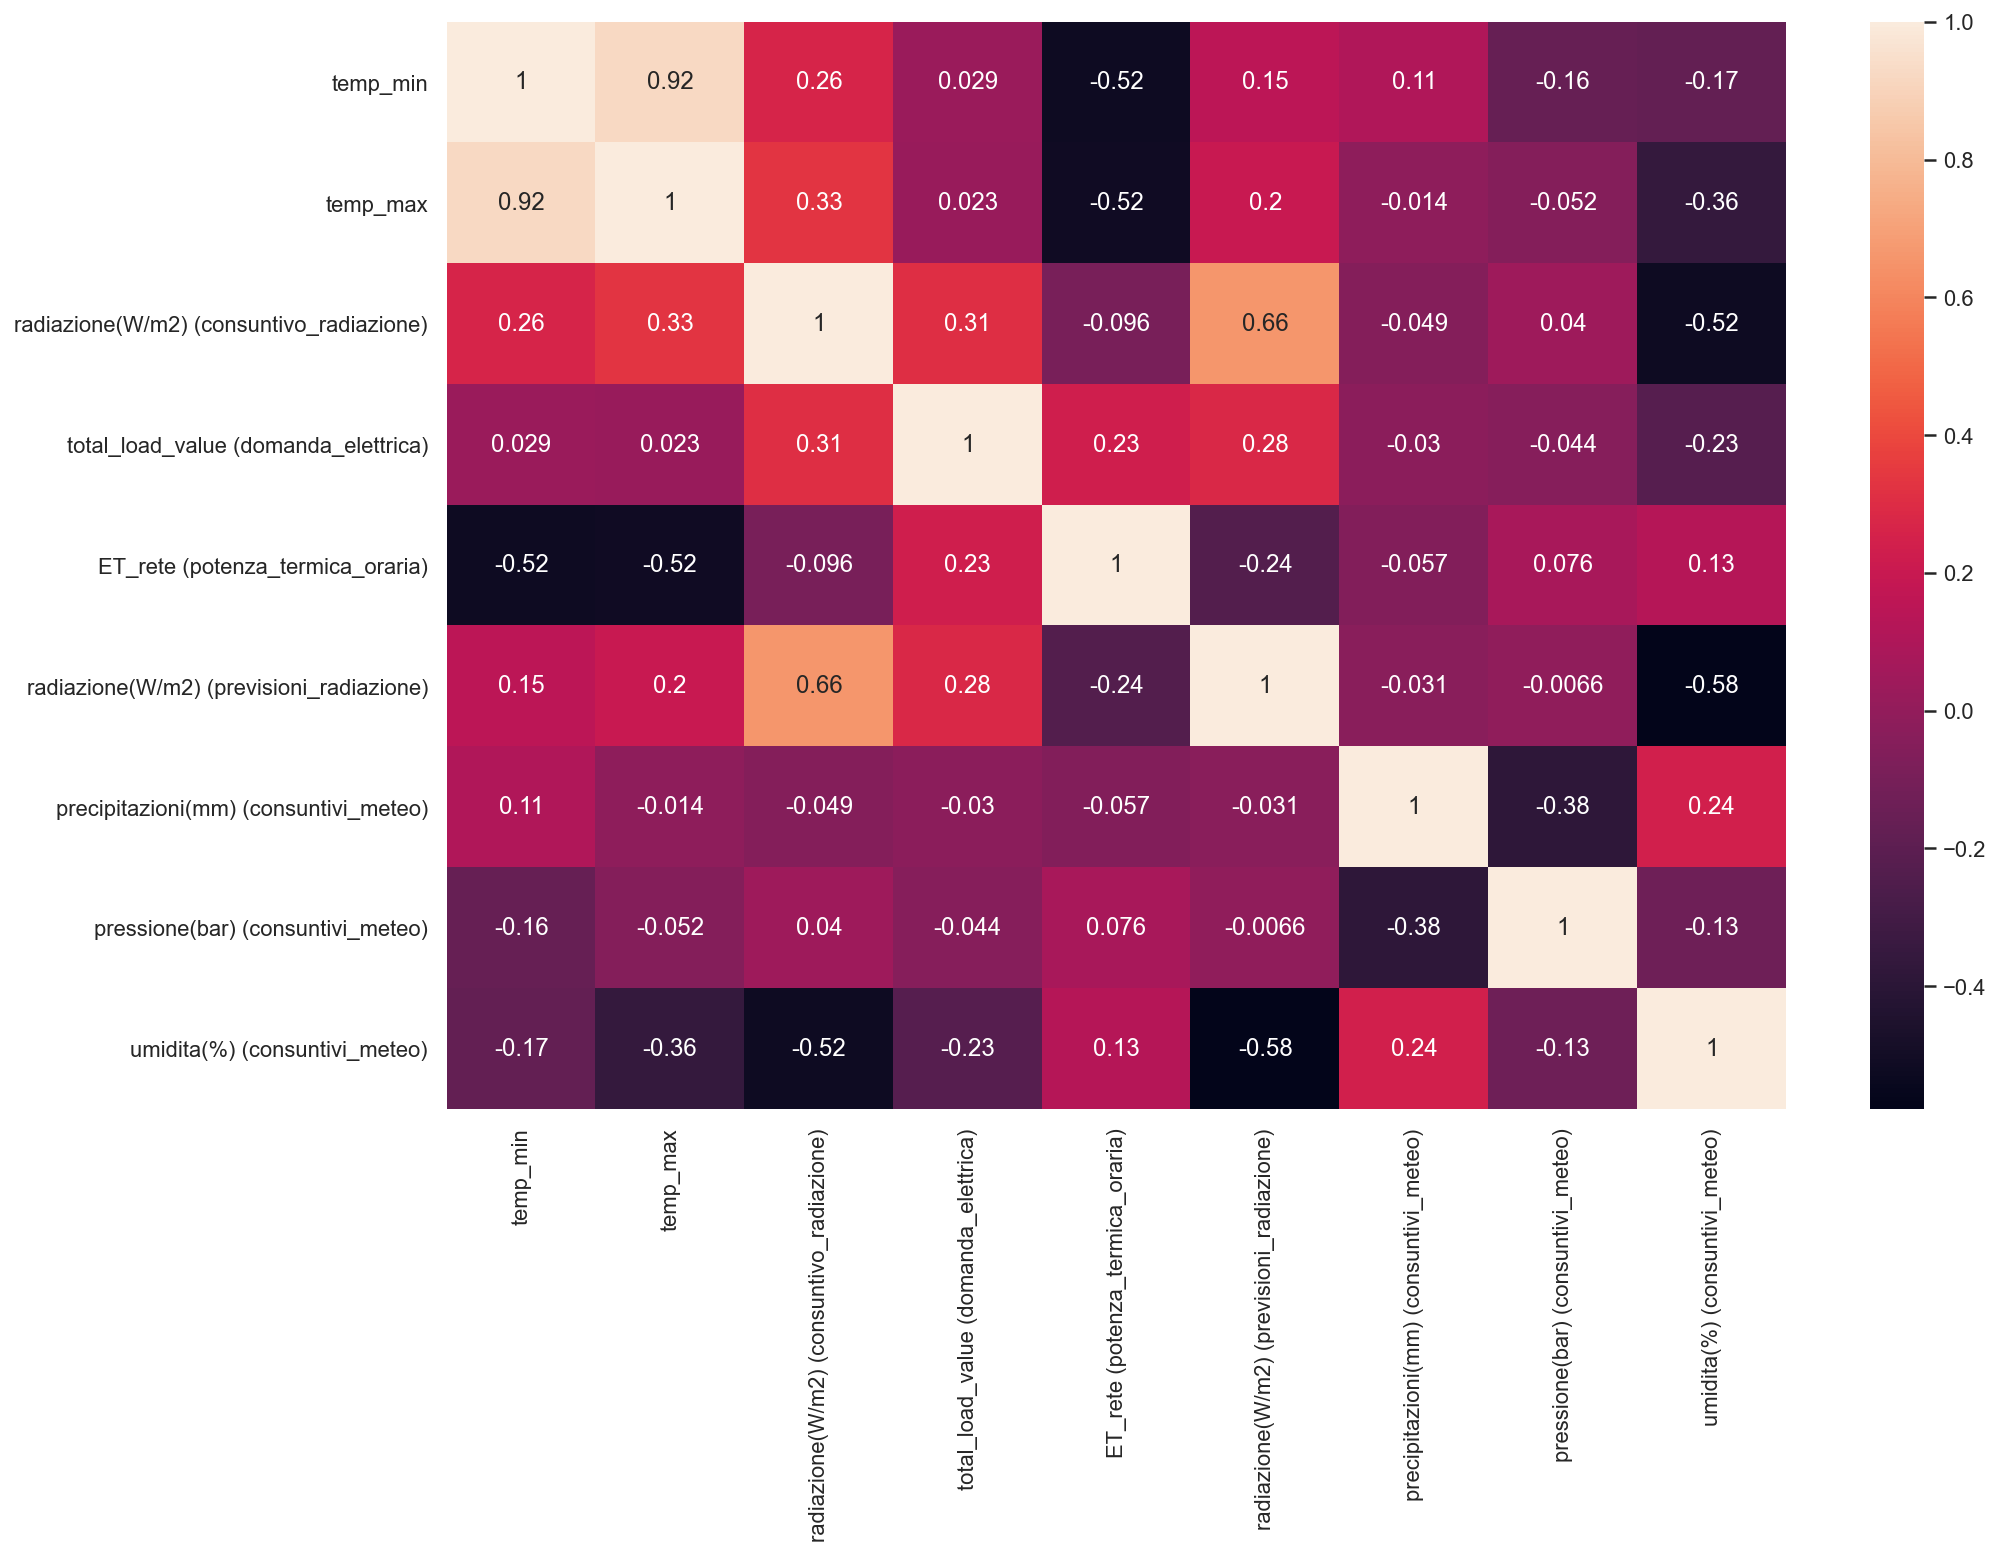

In [3]:
sns.heatmap(df_merge.corr(), annot=True)

<AxesSubplot:>

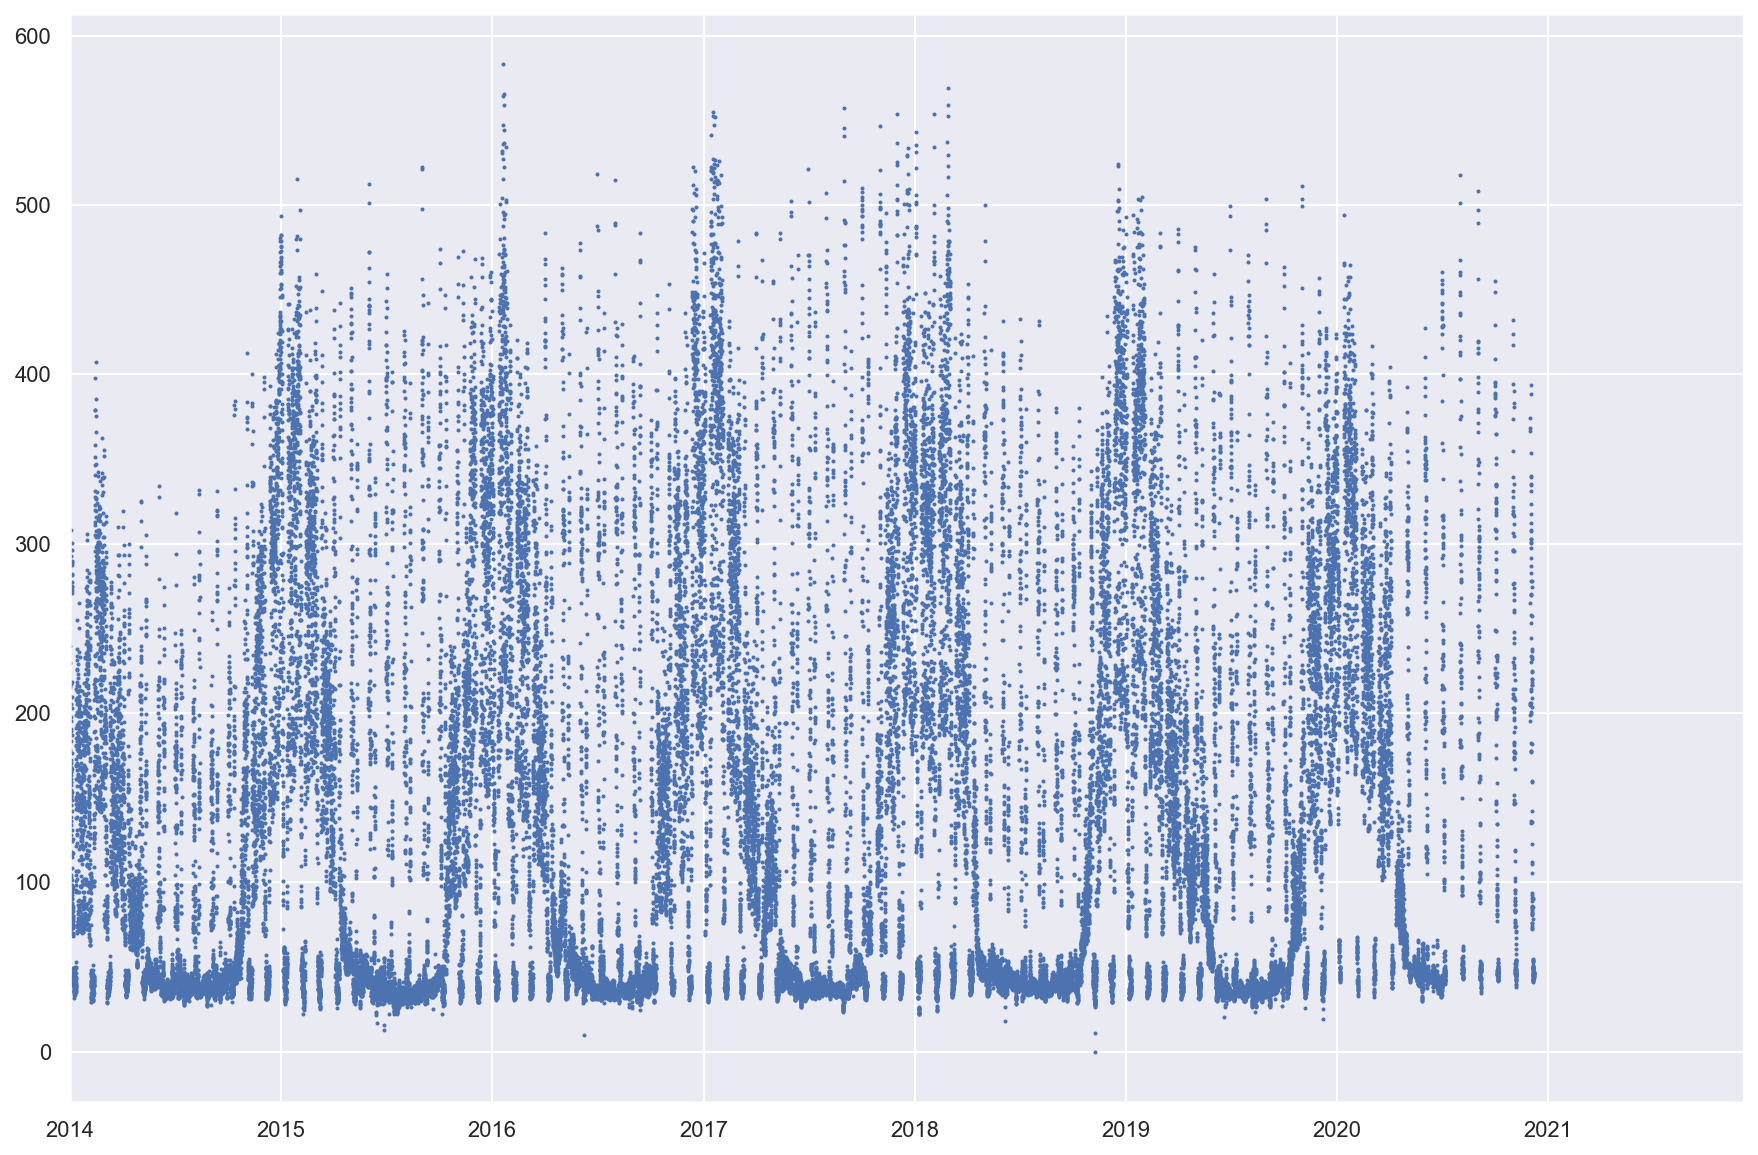

In [4]:
df_merge['ET_rete (potenza_termica_oraria)'].plot(marker='.',markersize=2,linestyle='')

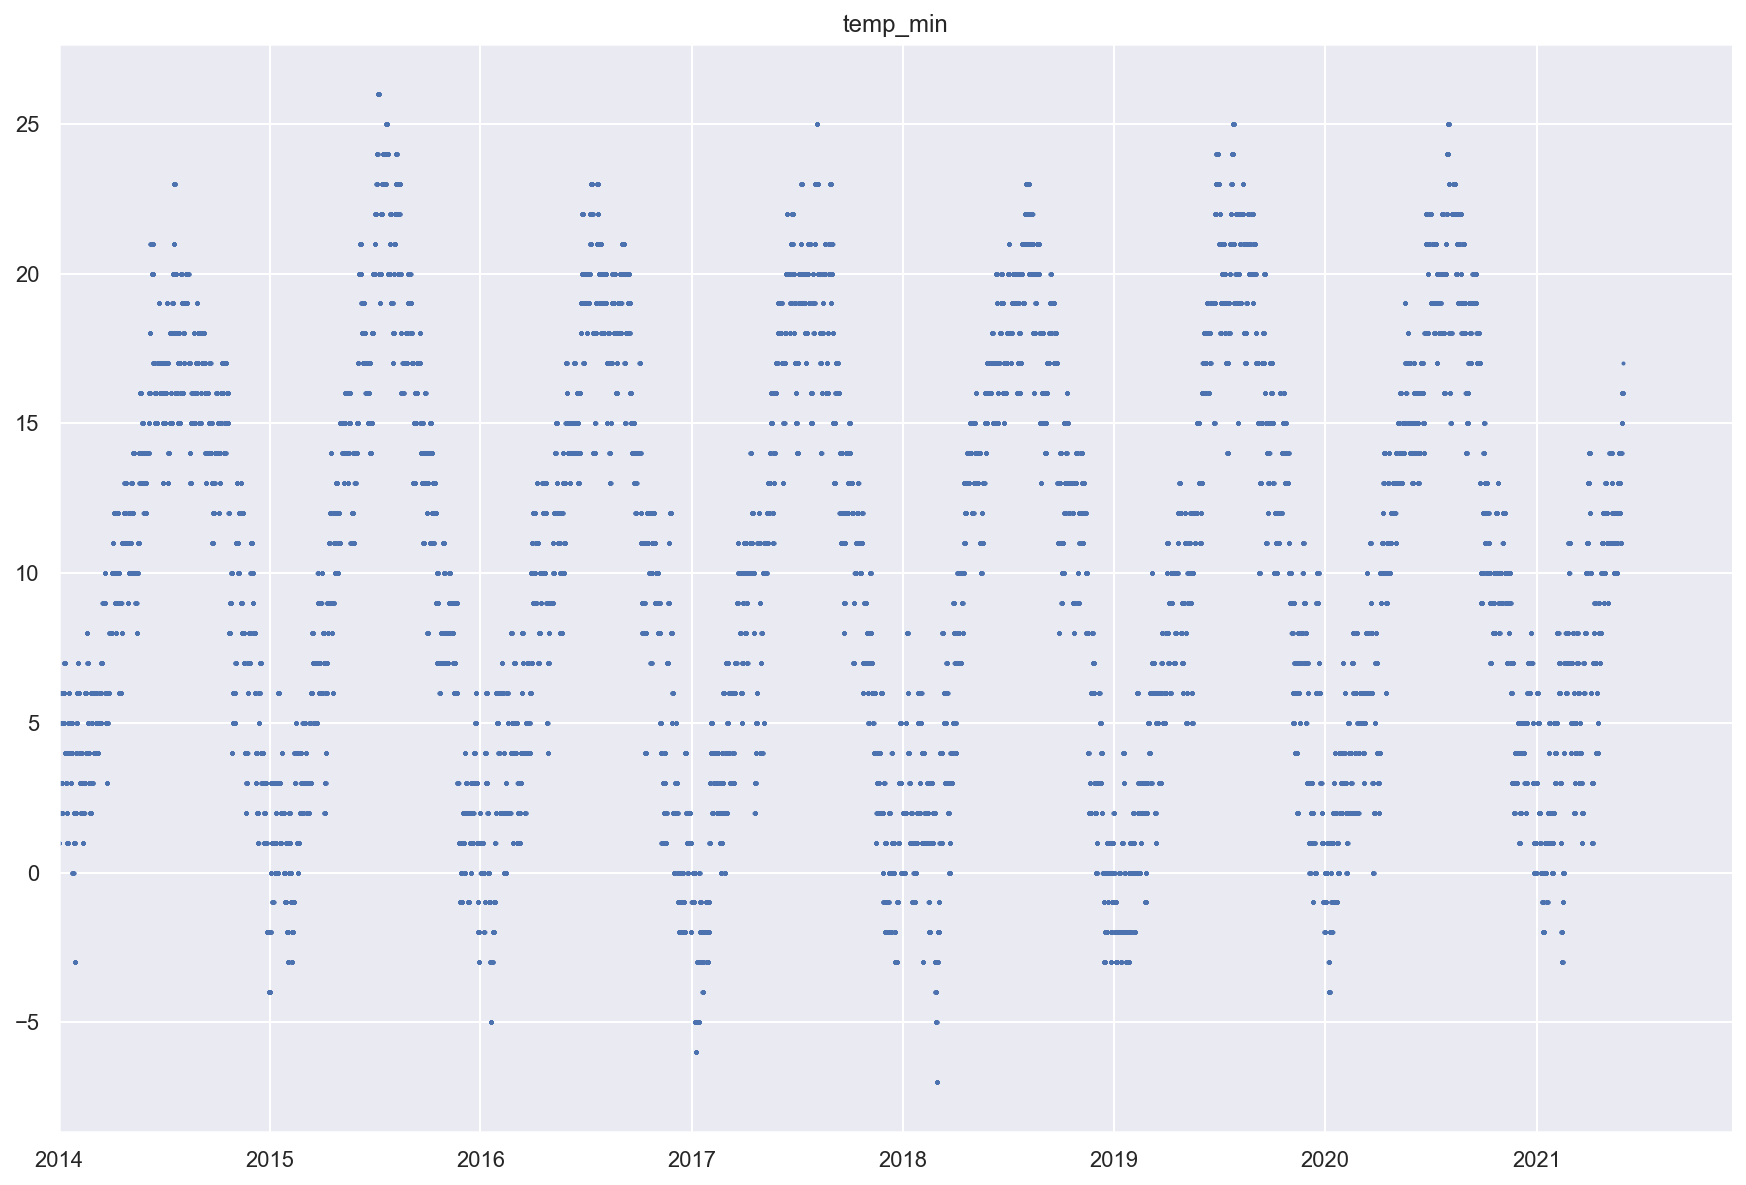

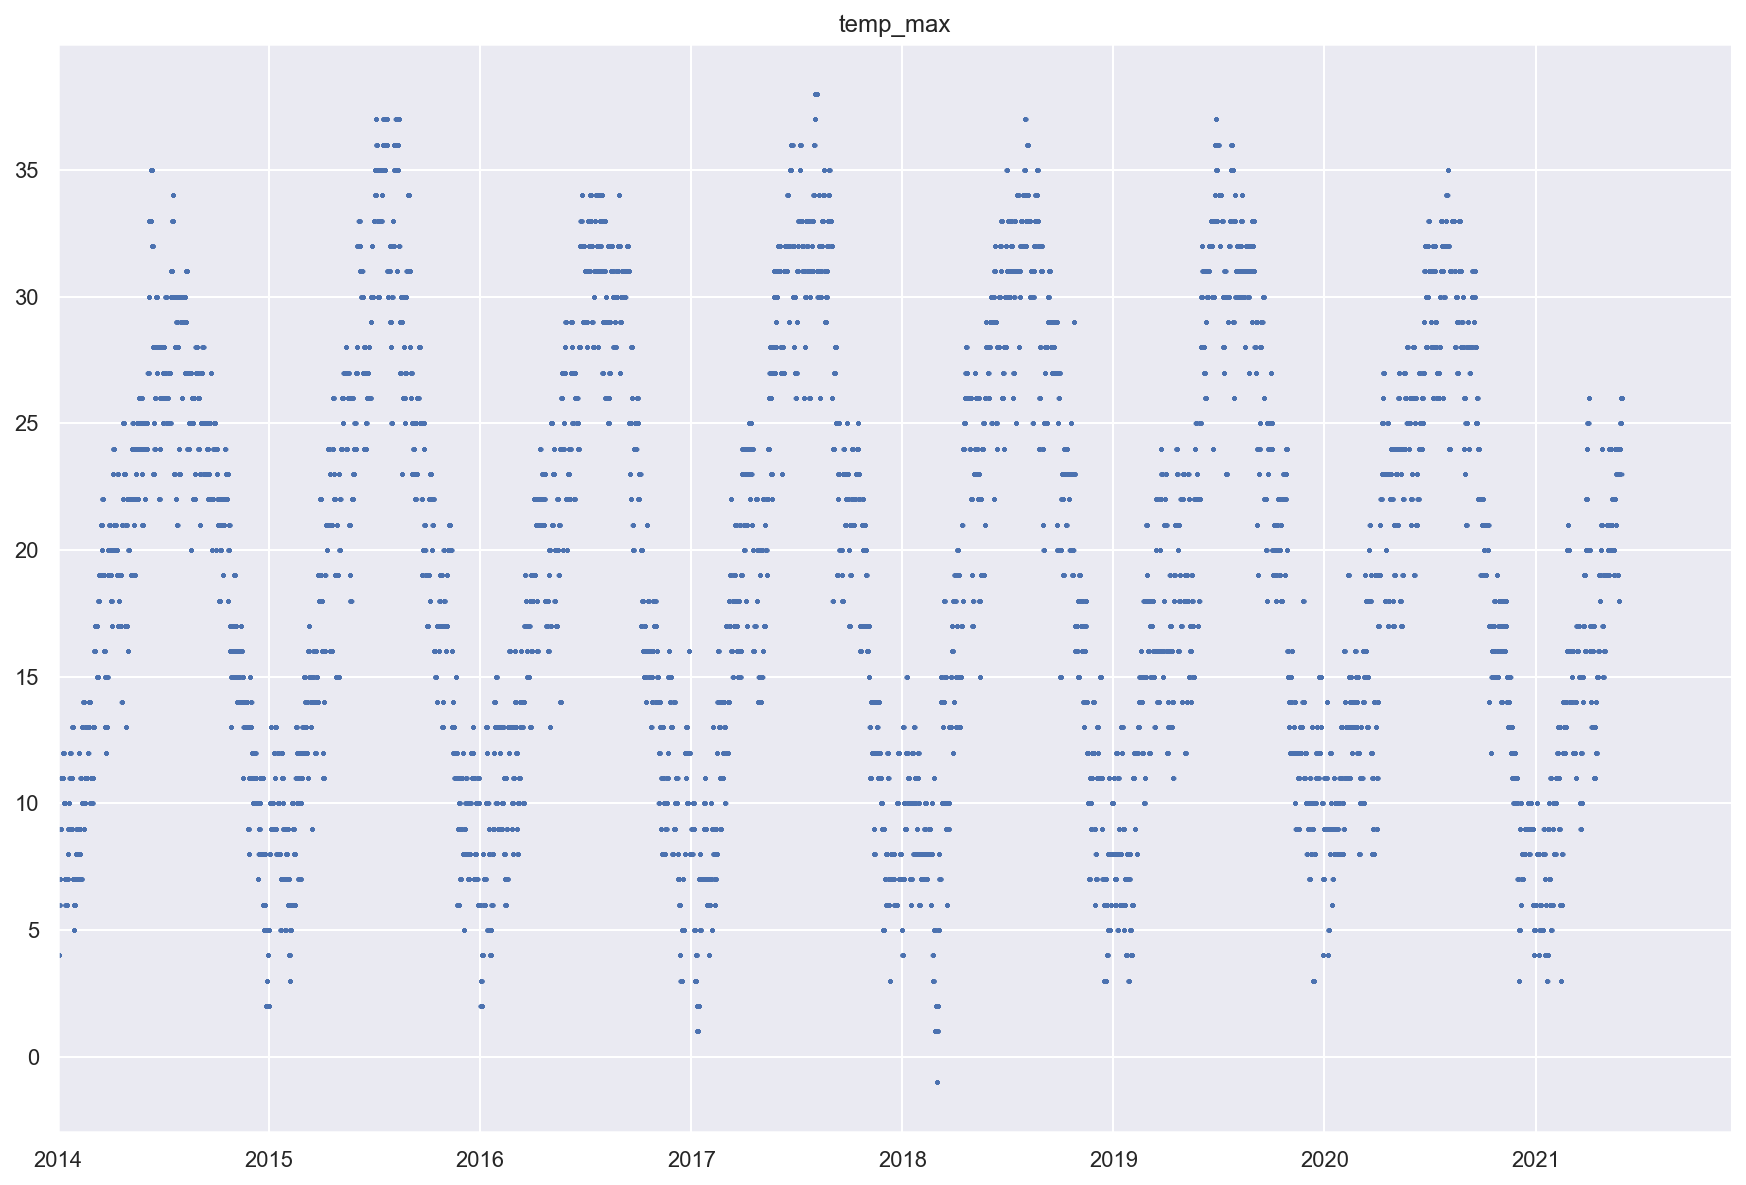

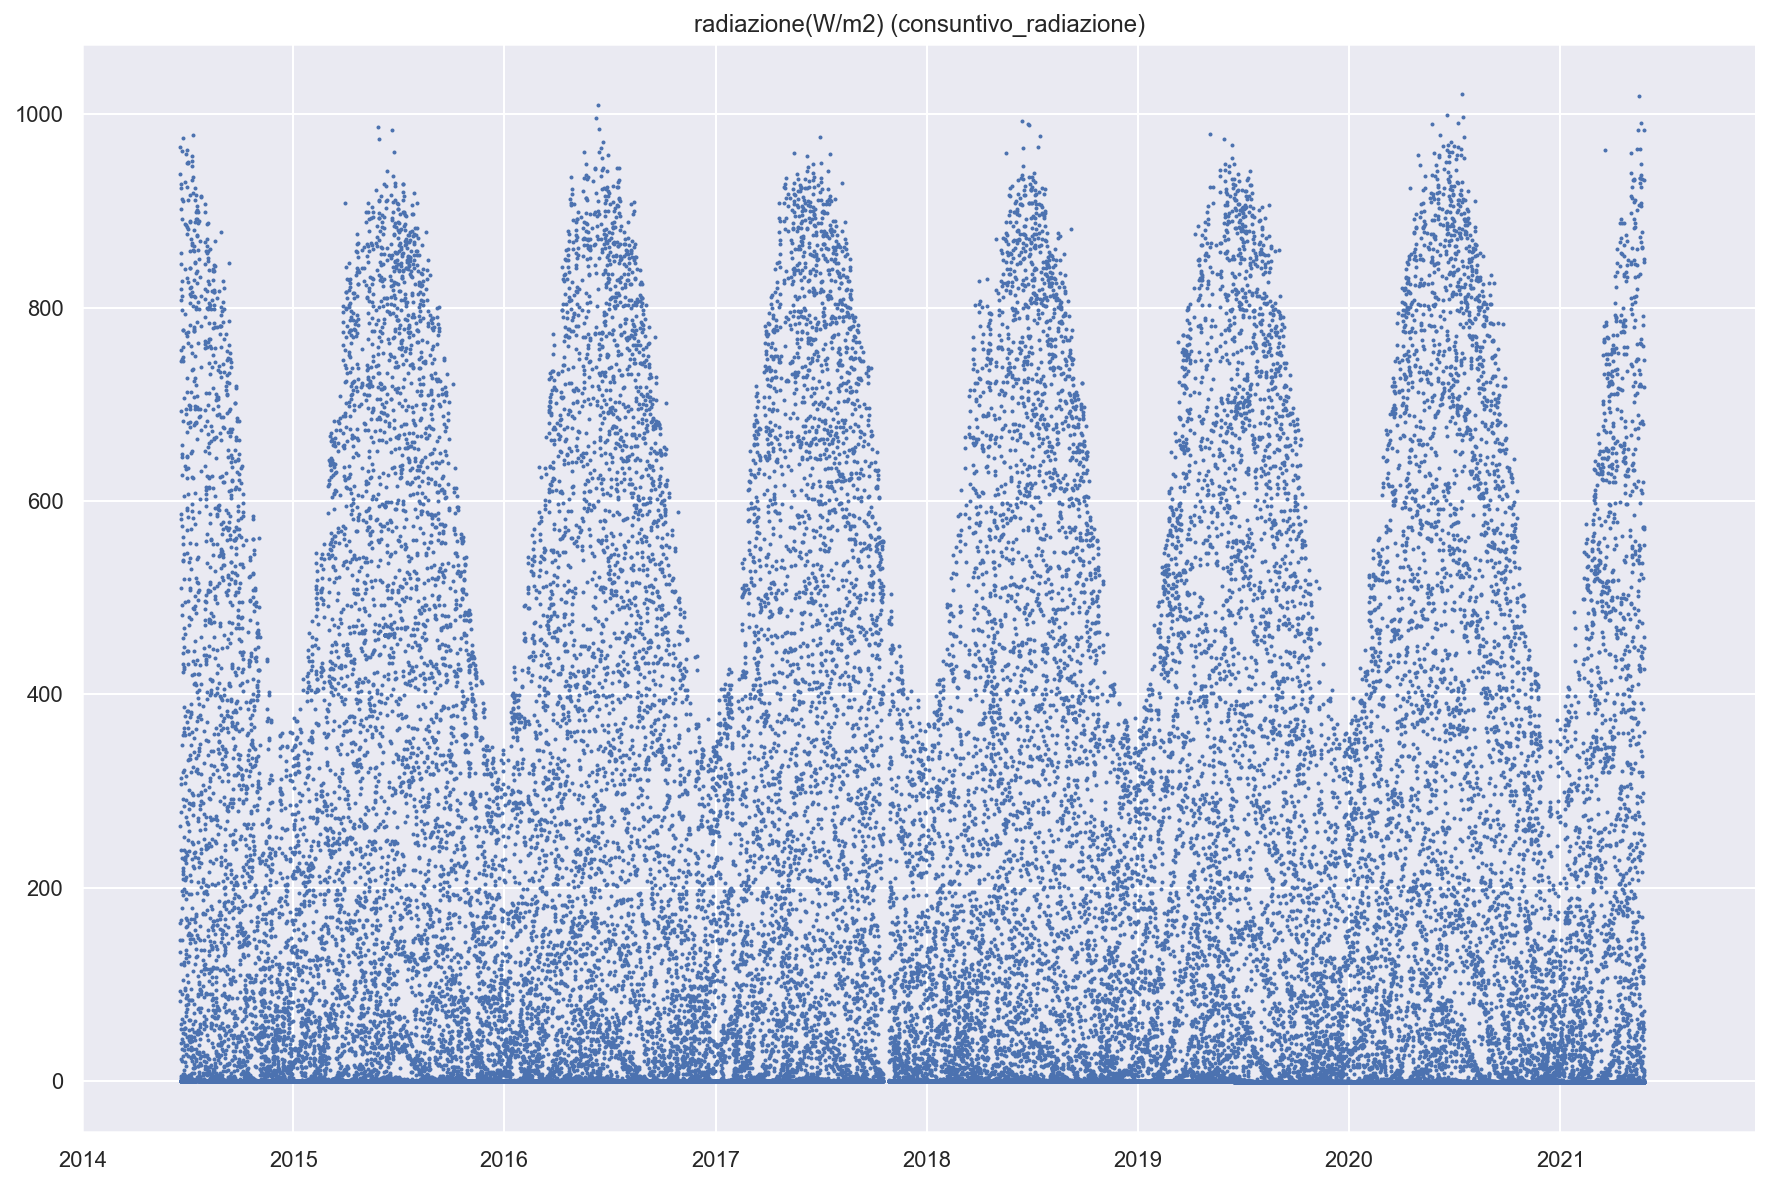

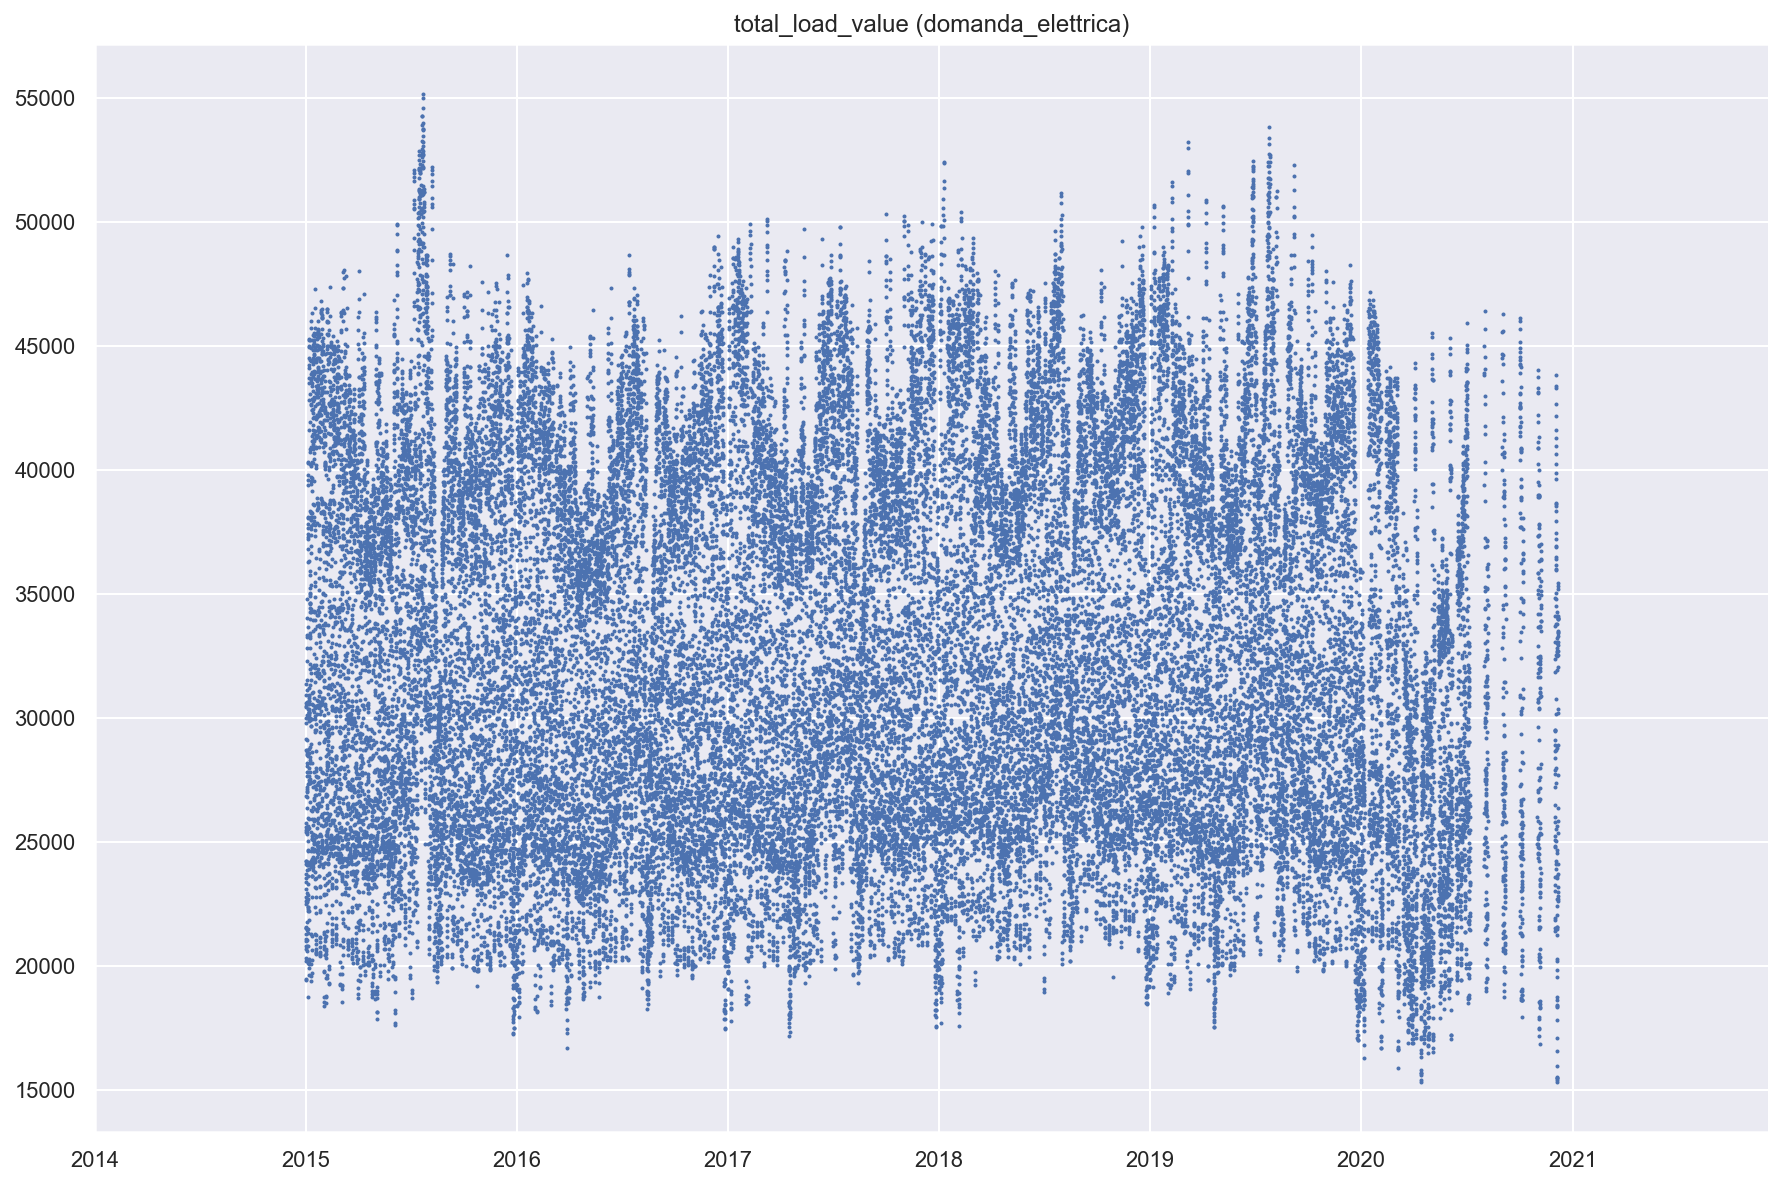

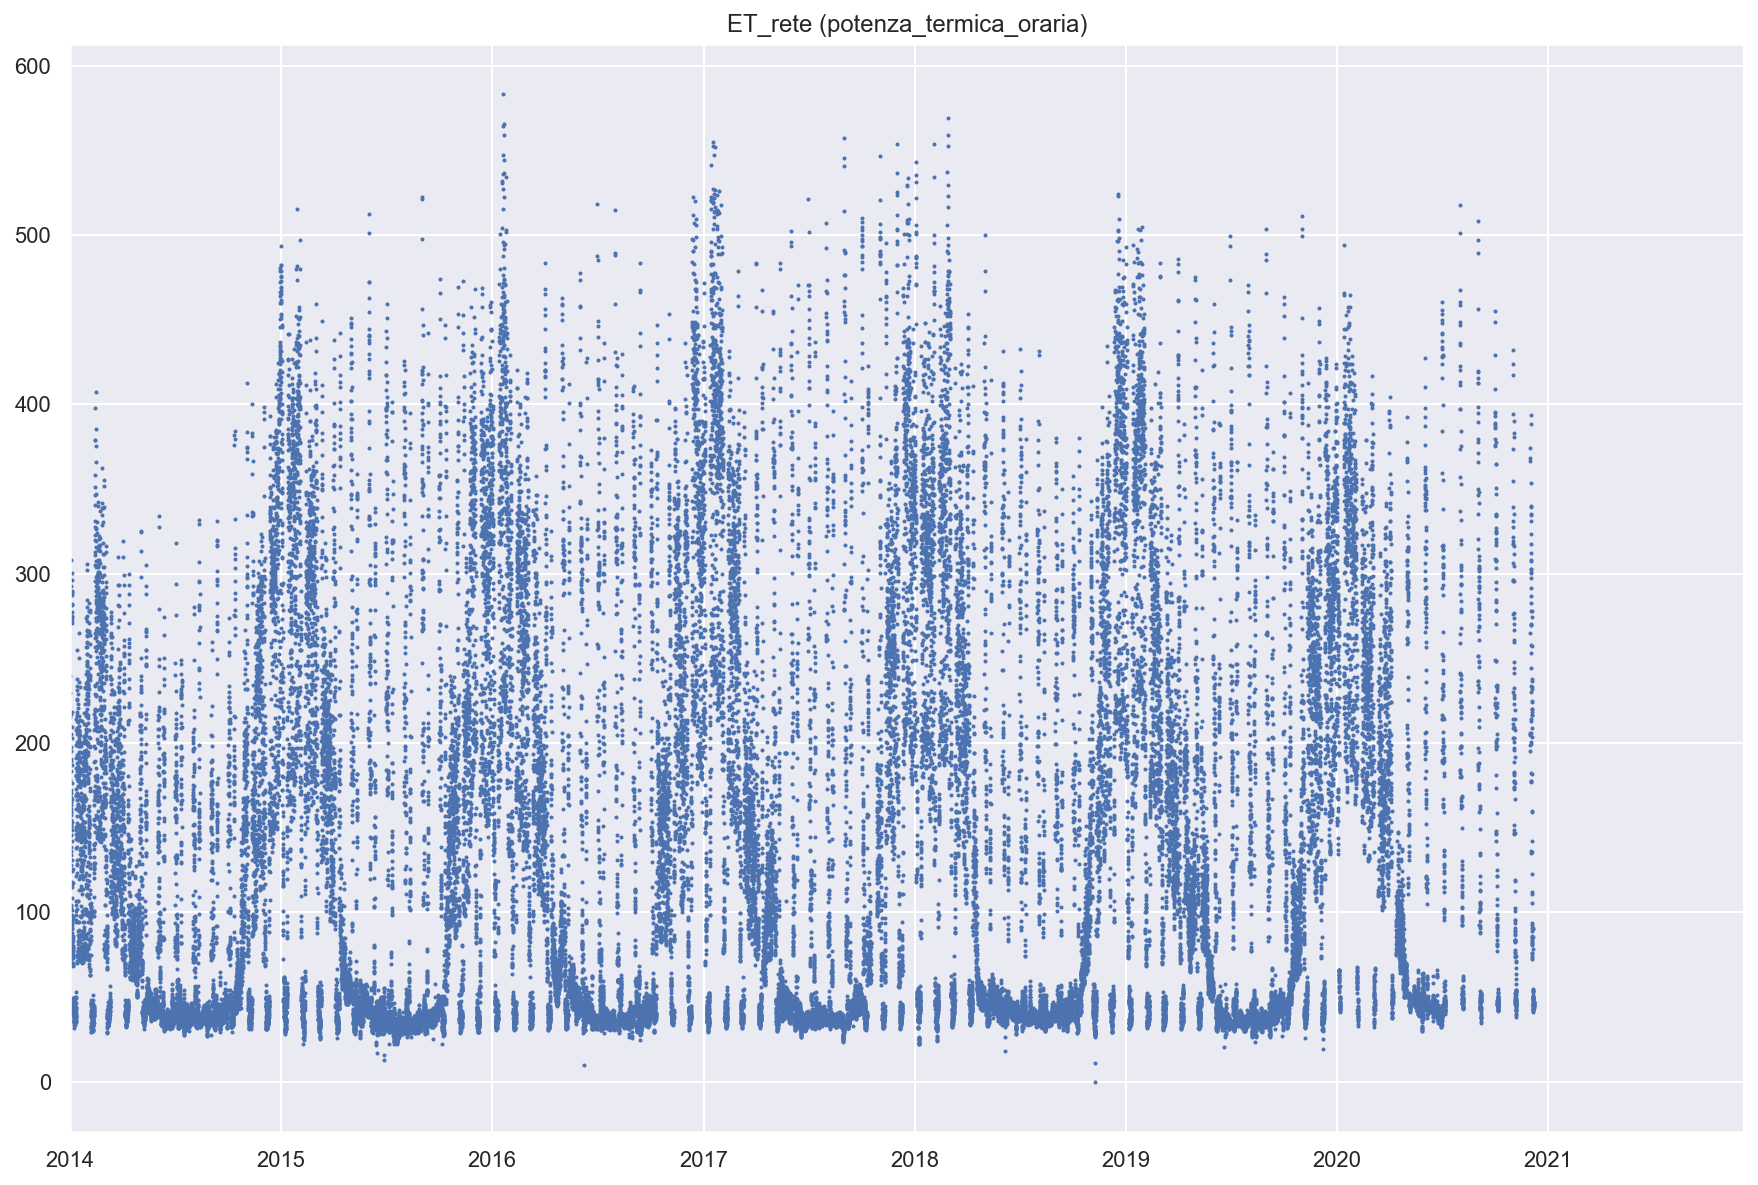

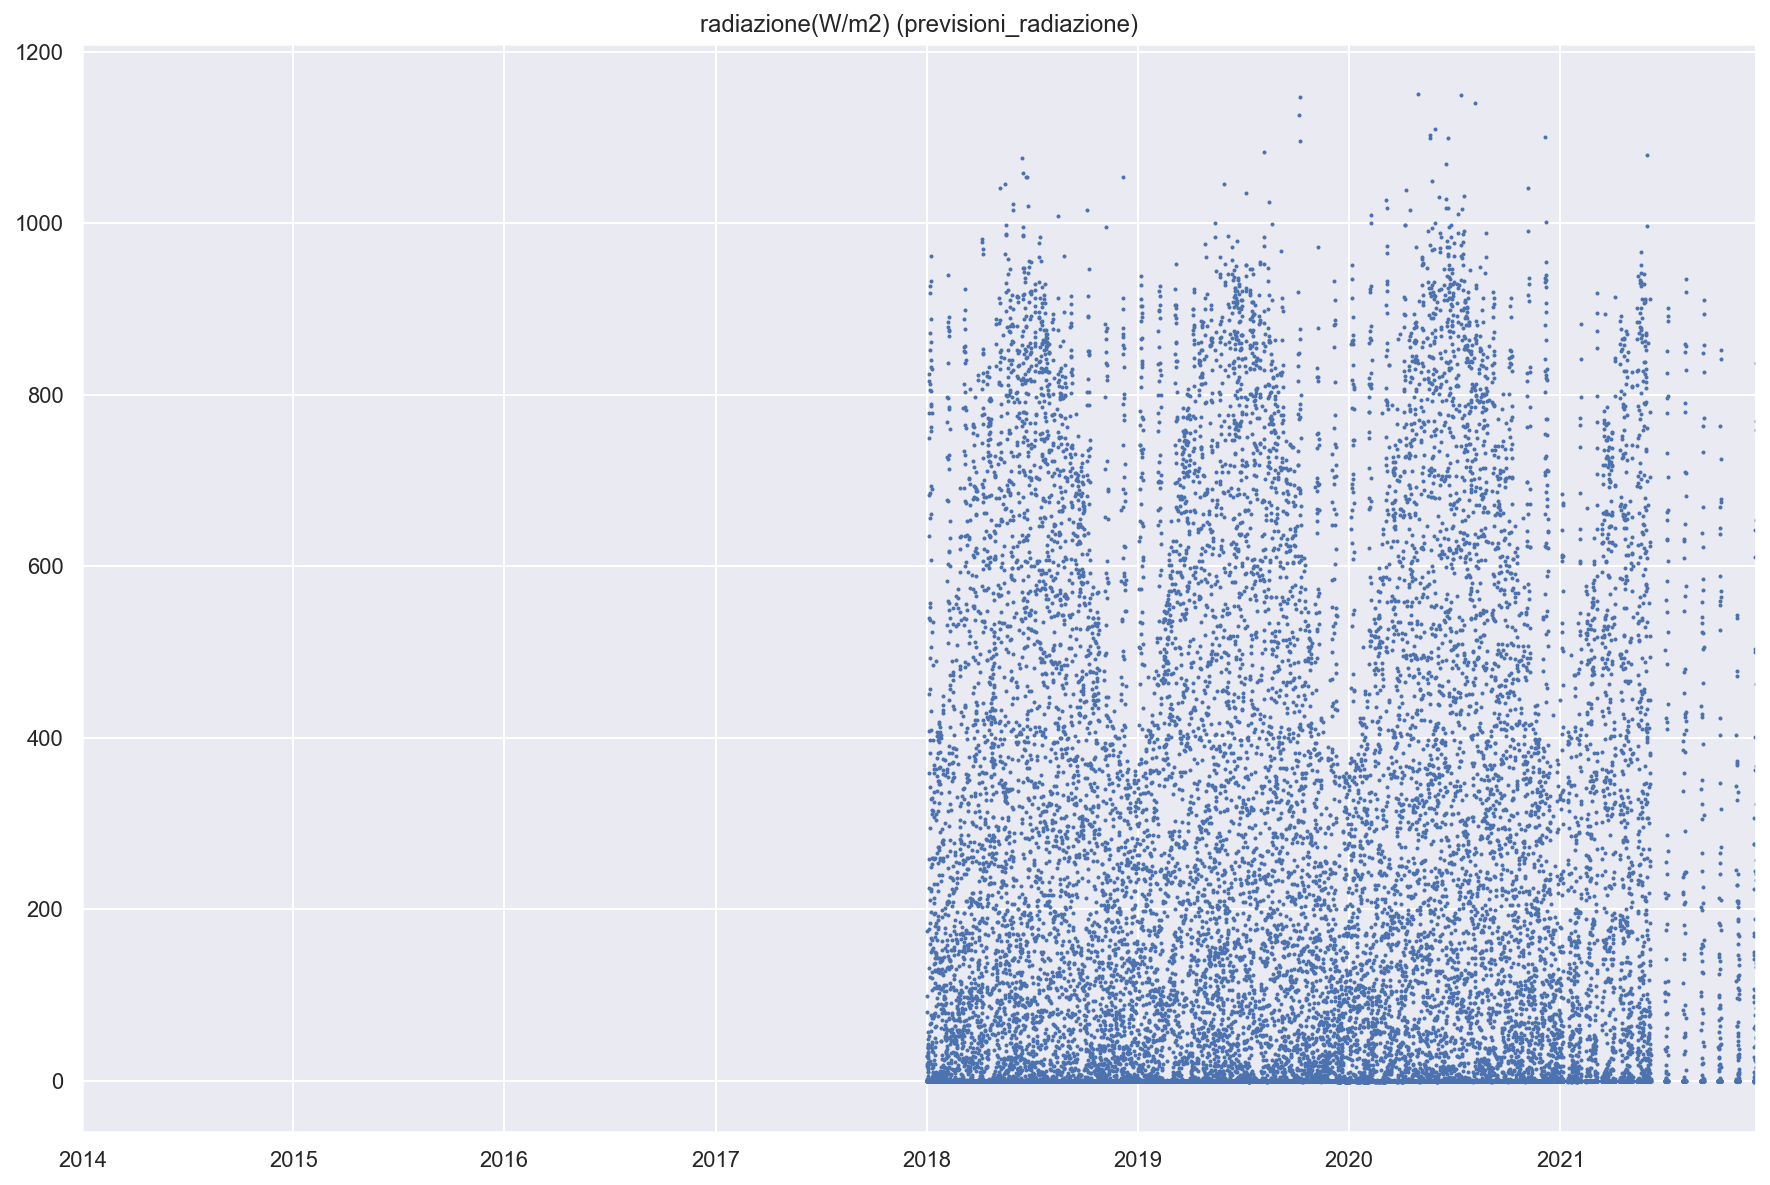

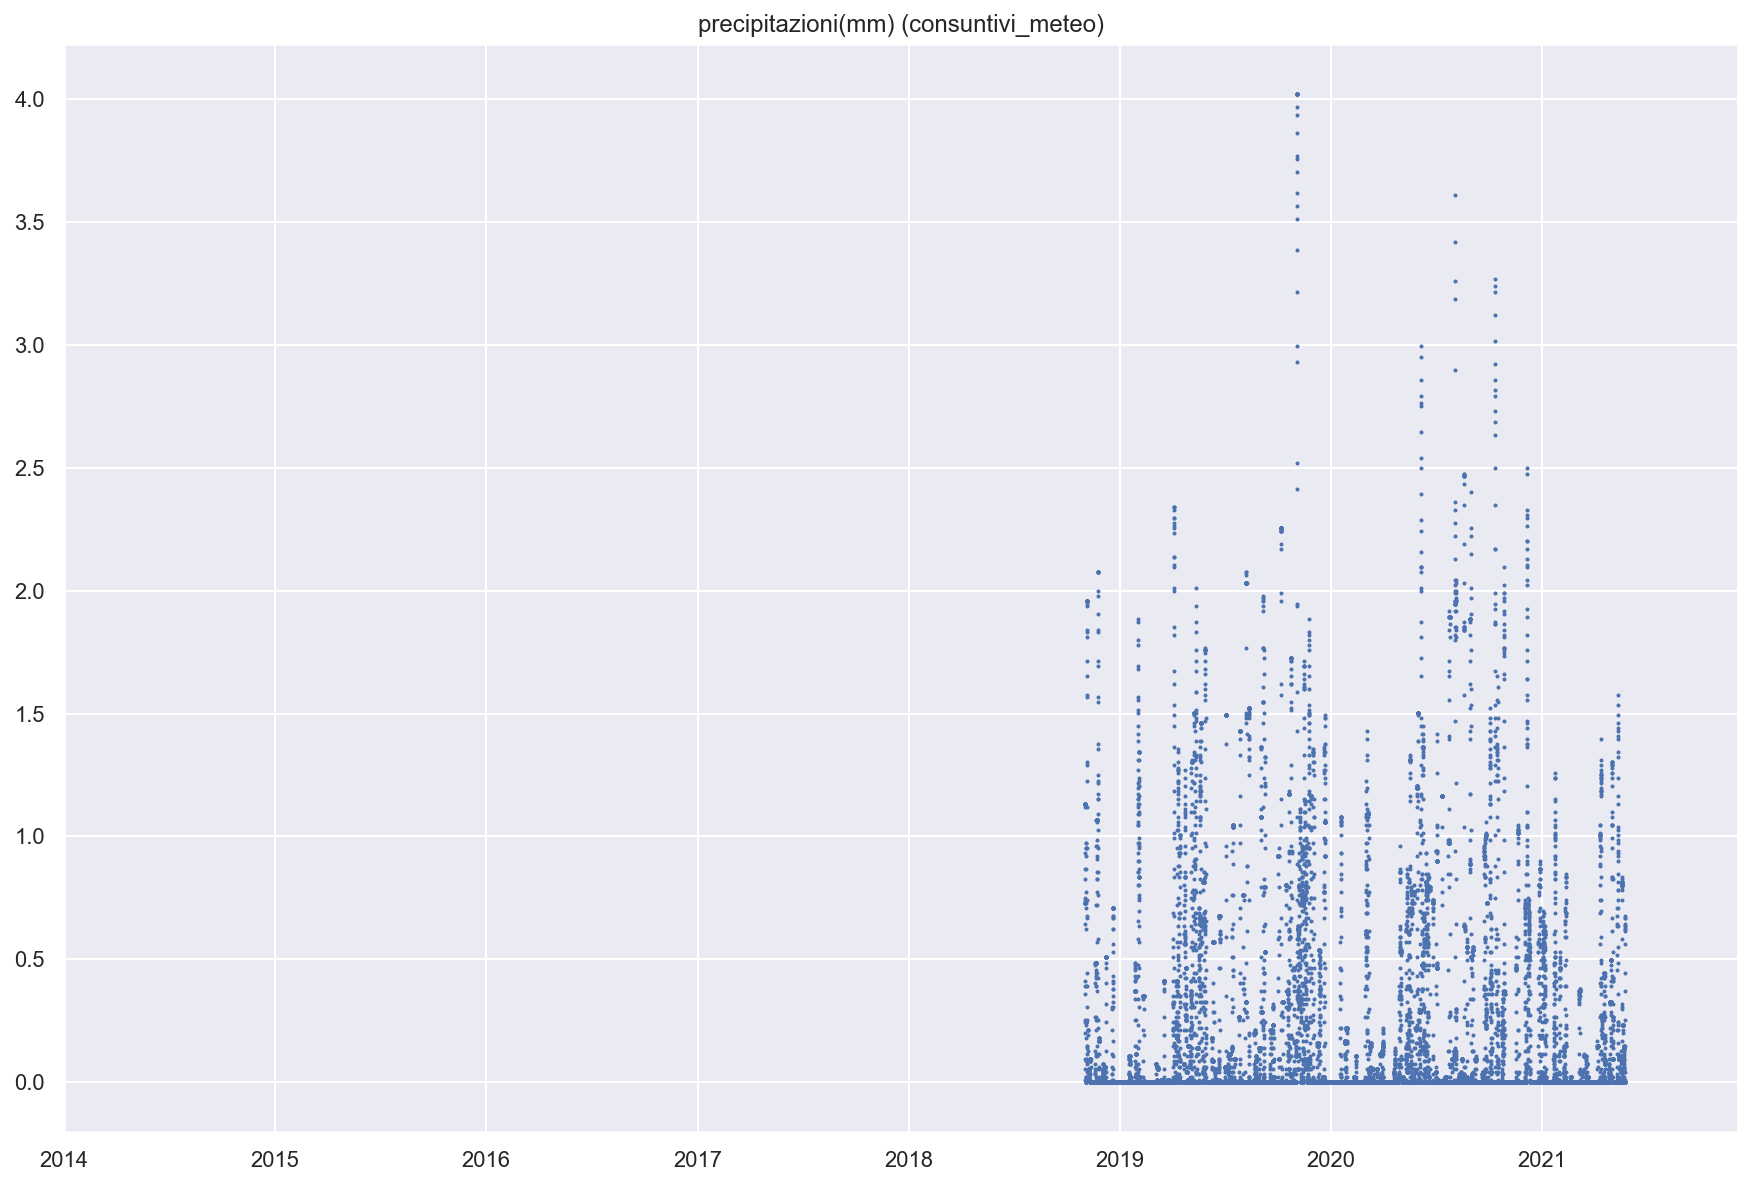

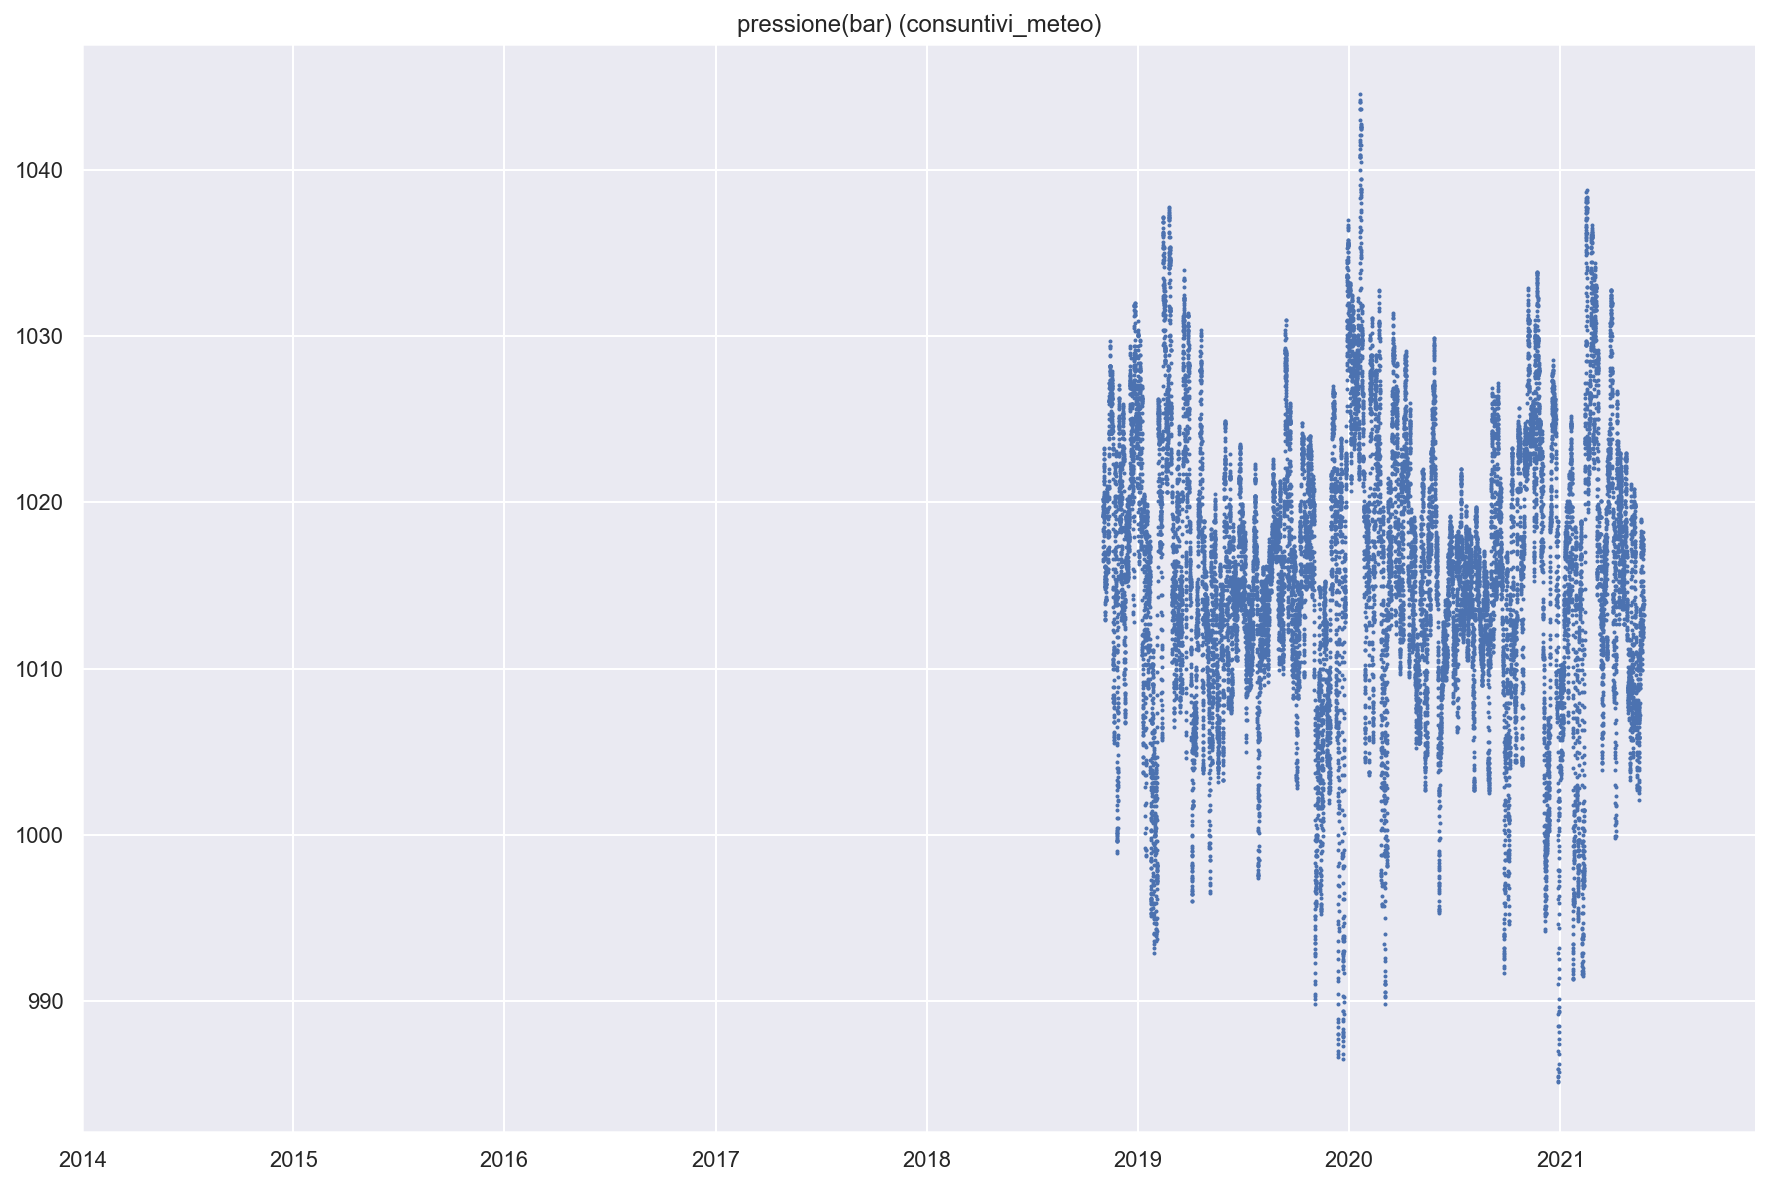

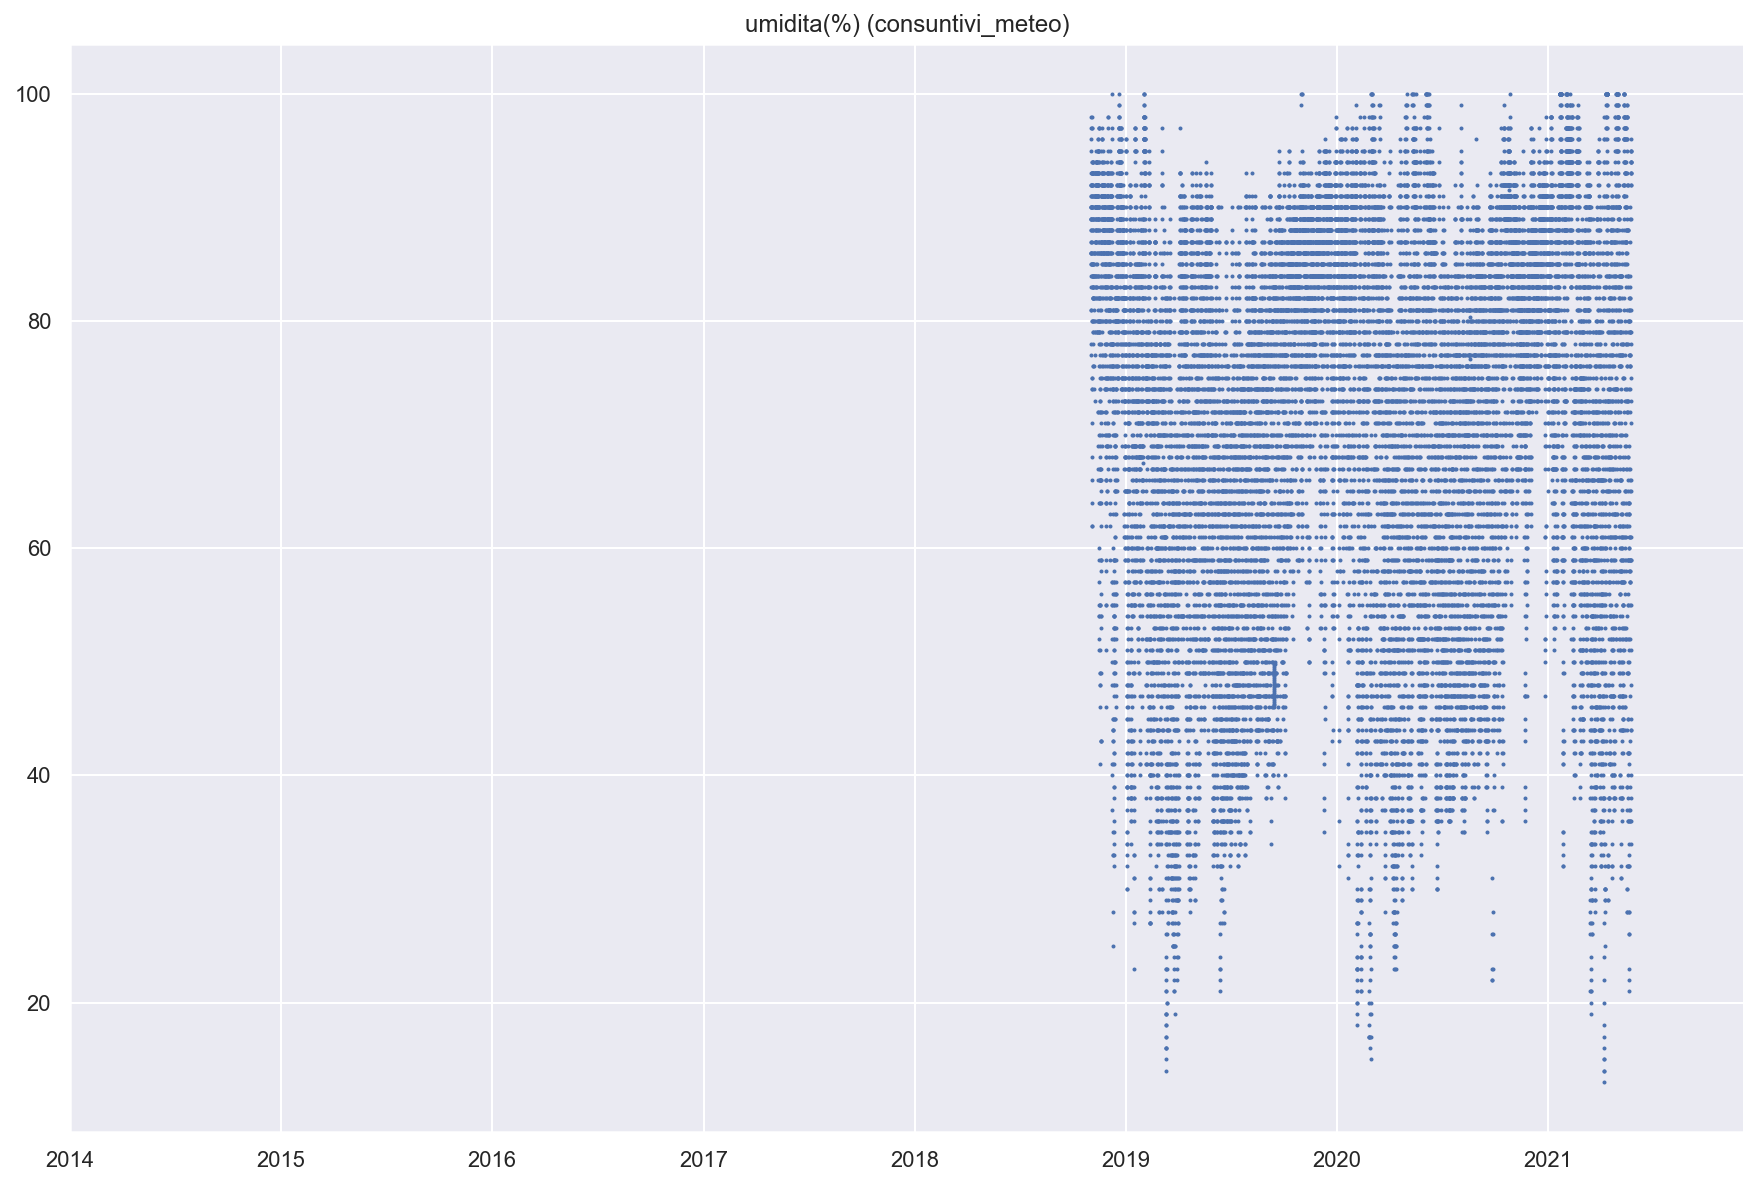

In [5]:
for c in df_merge.columns:
    df_merge[c].plot(marker='.',markersize=2,linestyle='')
    plt.title(c)
    plt.show()

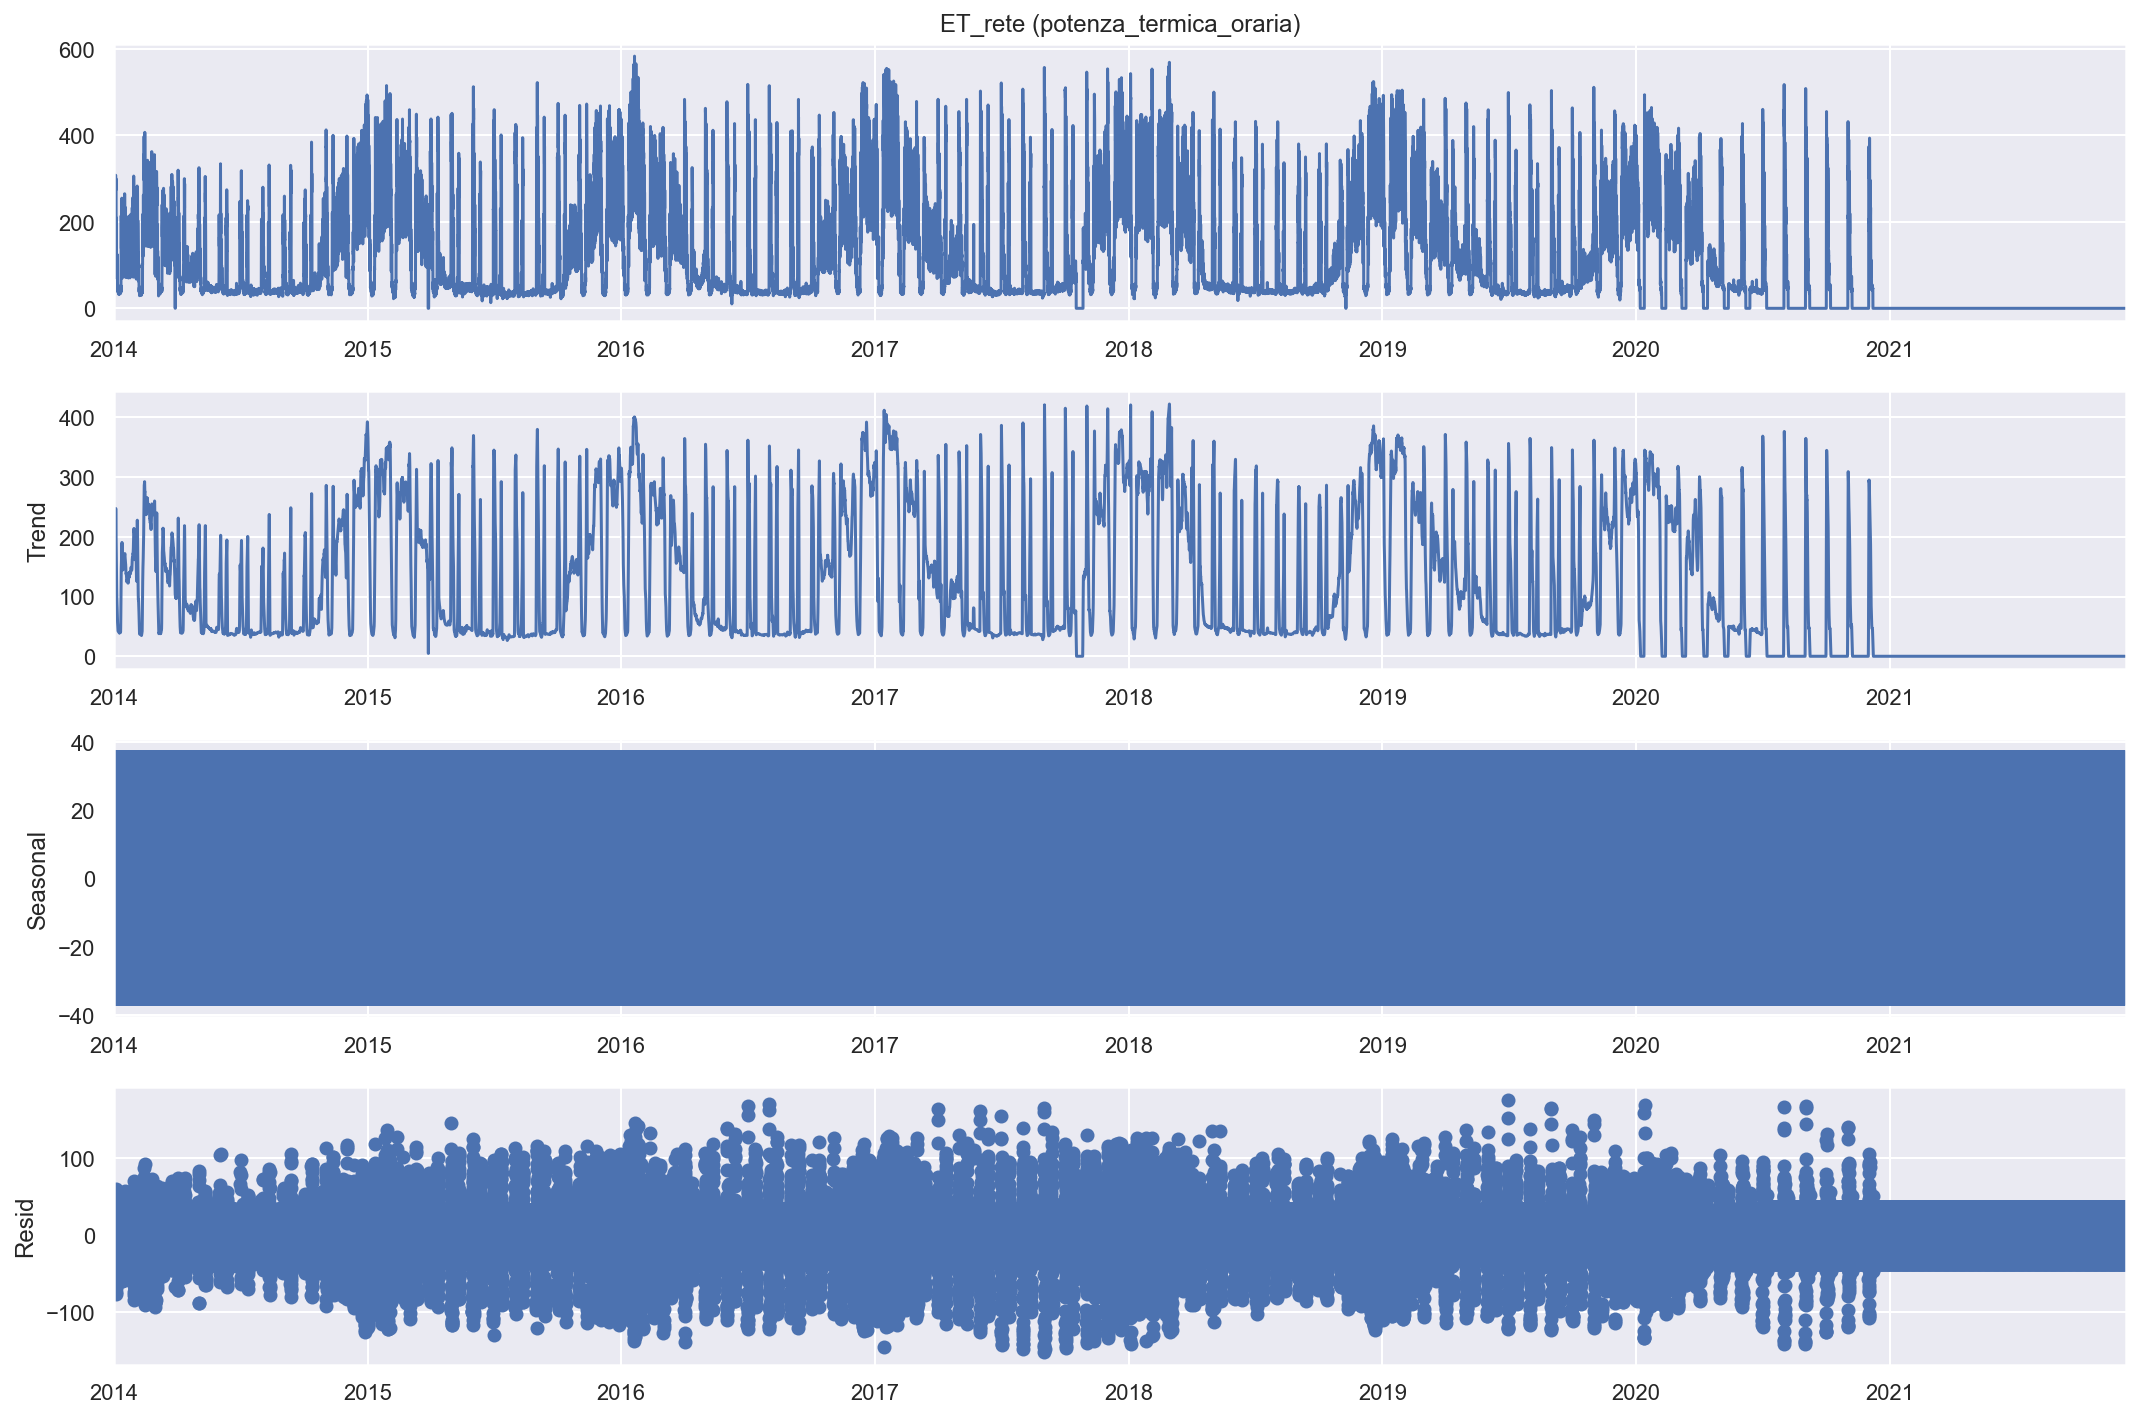

In [8]:
plot = seasonal_decompose(df_merge['ET_rete (potenza_termica_oraria)'].fillna(0)).plot()

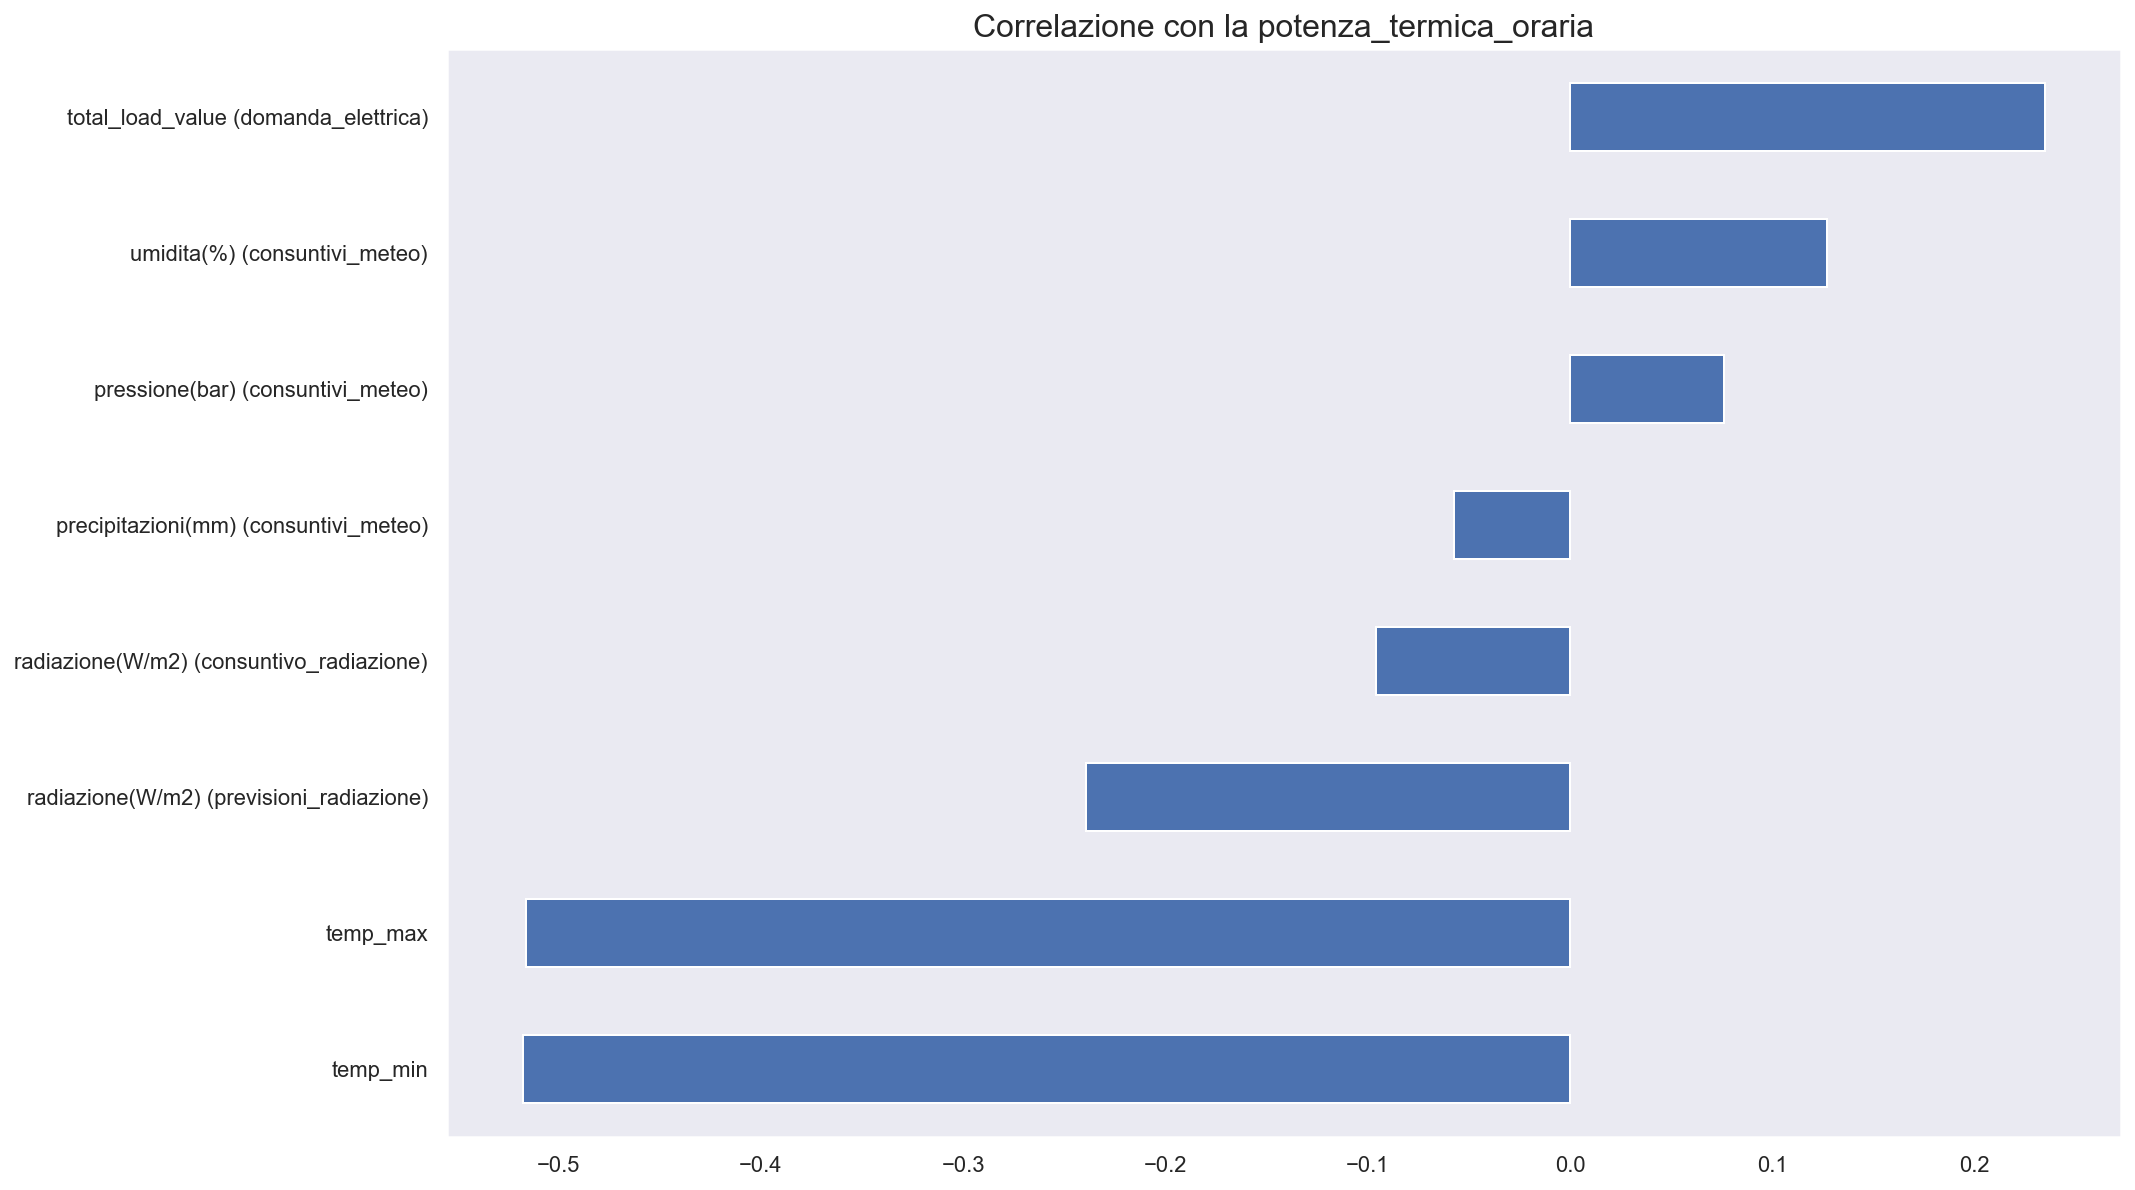

In [10]:
df_merge.corr()["ET_rete (potenza_termica_oraria)"].sort_values()[:-1].plot(kind='barh')

plt.title("Correlazione con la potenza_termica_oraria", fontsize=16)
plt.grid()
plt.show()

In [27]:
df_ = df["PrevisioniTemperatura"]

In [37]:
df["PrevisioniTemperatura"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IdPrevisione         5245 non-null   int64  
 1   FornitorePrevisioni  5245 non-null   object 
 2   DataEmissione        5245 non-null   object 
 3   DataPrevisione       5245 non-null   object 
 4   TOra00-01            5245 non-null   float64
 5   TOra01-02            5245 non-null   float64
 6   TOra02-03            5245 non-null   float64
 7   TOra03-04            5245 non-null   float64
 8   TOra04-05            5245 non-null   float64
 9   TOra05-06            5245 non-null   float64
 10  TOra06-07            5245 non-null   float64
 11  TOra07-08            5245 non-null   float64
 12  TOra08-09            5245 non-null   float64
 13  TOra09-10            5245 non-null   float64
 14  TOra10-11            5245 non-null   float64
 15  TOra11-12            5245 non-null   f

In [39]:
df["PrevisioniTemperatura"][df["PrevisioniTemperatura"]["DataPrevisione"]=='04/11/2014']

IdPrevisione              FornitorePrevisioni DataEmissione DataPrevisione  \
2             1  SOCIET· METEOROLOGICA SUBALPINA    01/11/2014     04/11/2014   
4             1  SOCIET· METEOROLOGICA SUBALPINA    02/11/2014     04/11/2014   
6             1  SOCIET· METEOROLOGICA SUBALPINA    03/11/2014     04/11/2014   

   TOra00-01  TOra01-02  TOra02-03  TOra03-04  TOra04-05  TOra05-06  ...  \
2  12.482545  12.623923  12.627899  12.448288  12.140038  11.823212  ...   
4  13.593955  13.353415  12.879289  12.265422  11.653644  11.193362  ...   
6  11.144367  11.163095  11.127771  11.009014  10.860719  10.786472  ...   

   TOra14-15  TOra15-16  TOra16-17  TOra17-18  TOra18-19  TOra19-20  \
2  16.398144  16.316124  15.872925  15.175725  14.389238  13.699287   
4  16.469688  16.461287  16.118658  15.532180  14.835529  14.177955   
6  17.082148  16.982477  16.520267  15.816924  15.044945  14.390094   

   TOra20-21  TOra21-22  TOra22-23  TOra23-24  
2  13.263628  13.158369  13.333066  13.593073  
4  13.688763  13.439744  13.414148  13.494062  
6  14.002460  13.945050  14.153220  14.423556  

[3 rows x 28 columns]

In [40]:
pd.to_datetime(df["PrevisioniTemperatura"]["DataPrevisione"], format="%d/%m/%Y")

0      2014-11-02
1      2014-11-03
2      2014-11-04
3      2014-11-03
4      2014-11-04
          ...    
5240   2020-06-29
5241   2020-06-30
5242   2020-06-28
5243   2020-06-29
5244   2020-06-30
Name: DataPrevisione, Length: 5245, dtype: datetime64[ns]

In [41]:
df["PrevisioniTemperatura"]["DataPrevisione"] = pd.to_datetime(df["PrevisioniTemperatura"]["DataPrevisione"], format="%d/%m/%Y")

In [45]:
df["PrevisioniTemperatura"][df["PrevisioniTemperatura"]["DataPrevisione"]=='2014-11-04']

IdPrevisione              FornitorePrevisioni DataEmissione DataPrevisione  \
2             1  SOCIET· METEOROLOGICA SUBALPINA    01/11/2014     2014-11-04   
4             1  SOCIET· METEOROLOGICA SUBALPINA    02/11/2014     2014-11-04   
6             1  SOCIET· METEOROLOGICA SUBALPINA    03/11/2014     2014-11-04   

   TOra00-01  TOra01-02  TOra02-03  TOra03-04  TOra04-05  TOra05-06  ...  \
2  12.482545  12.623923  12.627899  12.448288  12.140038  11.823212  ...   
4  13.593955  13.353415  12.879289  12.265422  11.653644  11.193362  ...   
6  11.144367  11.163095  11.127771  11.009014  10.860719  10.786472  ...   

   TOra14-15  TOra15-16  TOra16-17  TOra17-18  TOra18-19  TOra19-20  \
2  16.398144  16.316124  15.872925  15.175725  14.389238  13.699287   
4  16.469688  16.461287  16.118658  15.532180  14.835529  14.177955   
6  17.082148  16.982477  16.520267  15.816924  15.044945  14.390094   

   TOra20-21  TOra21-22  TOra22-23  TOra23-24  
2  13.263628  13.158369  13.333066  13.593073  
4  13.688763  13.439744  13.414148  13.494062  
6  14.002460  13.945050  14.153220  14.423556  

[3 rows x 28 columns]

In [63]:
df["PrevisioniTemperatura"].set_index("DataPrevisione").resample("D").last()

IdPrevisione              FornitorePrevisioni DataEmissione  \
DataPrevisione                                                                
2009-12-30               1.0  SOCIET· METEOROLOGICA SUBALPINA    24/12/2019   
2009-12-31               NaN                             None          None   
2010-01-01               NaN                             None          None   
2010-01-02               NaN                             None          None   
2010-01-03               NaN                             None          None   
...                      ...                              ...           ...   
2020-06-29               1.0  SOCIET· METEOROLOGICA SUBALPINA    27/06/2020   
2020-06-30               1.0  SOCIET· METEOROLOGICA SUBALPINA    27/06/2020   
2020-07-01               1.0  SOCIET· METEOROLOGICA SUBALPINA    28/06/2020   
2020-07-02               1.0  SOCIET· METEOROLOGICA SUBALPINA    28/06/2020   
2020-07-03               1.0  SOCIET· METEOROLOGICA SUBALPINA    29/06/2020   

                TOra00-01  TOra01-02  TOra02-03  TOra03-04  TOra04-05  \
DataPrevisione                                                          
2009-12-30       4.200000   4.100000   4.000000   4.000000   4.000000   
2009-12-31            NaN        NaN        NaN        NaN        NaN   
2010-01-01            NaN        NaN        NaN        NaN        NaN   
2010-01-02            NaN        NaN        NaN        NaN        NaN   
2010-01-03            NaN        NaN        NaN        NaN        NaN   
...                   ...        ...        ...        ...        ...   
2020-06-29      24.812136  23.678297  22.145609  20.763710  19.954489   
2020-06-30      23.230028  22.524599  21.795721  21.252386  21.062307   
2020-07-01      24.947754  24.110996  23.486591  23.043341  22.777592   
2020-07-02      23.200993  22.823471  22.398689  22.049395  21.890060   
2020-07-03      24.343729  23.697914  22.714245  21.782989  21.192801   

                TOra05-06  TOra06-07  ...  TOra14-15  TOra15-16  TOra16-17  \
DataPrevisione                        ...                                    
2009-12-30       3.900000   3.000000  ...   8.500000   6.700000   6.100000   
2009-12-31            NaN        NaN  ...        NaN        NaN        NaN   
2010-01-01            NaN        NaN  ...        NaN        NaN        NaN   
2010-01-02            NaN        NaN  ...        NaN        NaN        NaN   
2010-01-03            NaN        NaN  ...        NaN        NaN        NaN   
...                   ...        ...  ...        ...        ...        ...   
2020-06-29      19.920662  20.650511  ...  30.816399  31.205221  31.445522   
2020-06-30      21.305611  21.971272  ...  30.463743  30.938625  31.240610   
2020-07-01      22.714289  22.894560  ...  31.658335  32.264366  32.364429   
2020-07-02      21.993744  22.384846  ...  30.522329  31.255552  31.707399   
2020-07-03      21.056963  21.324297  ...  21.840391  21.658377  21.692497   

                TOra17-18  TOra18-19  TOra19-20  TOra20-21  TOra21-22  \
DataPrevisione                                                          
2009-12-30       5.500000   5.100000   4.759885   4.500000   3.800000   
2009-12-31            NaN        NaN        NaN        NaN        NaN   
2010-01-01            NaN        NaN        NaN        NaN        NaN   
2010-01-02            NaN        NaN        NaN        NaN        NaN   
2010-01-03            NaN        NaN        NaN        NaN        NaN   
...                   ...        ...        ...        ...        ...   
2020-06-29      31.504372  31.293154  30.690706  29.589706  27.959850   
2020-06-30      31.354782  31.249660  30.885159  30.229567  29.283157   
2020-07-01      31.920557  30.959110  29.573198  27.915762  26.182627   
2020-07-02      31.806829  31.494362  30.738638  29.556608  28.033487   
2020-07-03      21.914427  22.212423  22.415554  22.342516  21.868696   

                TOra22-23  TOra23-24  
DataPrevisione                    

In [55]:
df_index = df["PrevisioniTemperatura"].set_index("DataPrevisione")

In [57]:
df_index.loc["2009"]

IdPrevisione              FornitorePrevisioni DataEmissione  \
DataPrevisione                                                                
2009-12-30                 1  SOCIET· METEOROLOGICA SUBALPINA    24/12/2019   

                TOra00-01  TOra01-02  TOra02-03  TOra03-04  TOra04-05  \
DataPrevisione                                                          
2009-12-30            4.2        4.1        4.0        4.0        4.0   

                TOra05-06  TOra06-07  ...  TOra14-15  TOra15-16  TOra16-17  \
DataPrevisione                        ...                                    
2009-12-30            3.9        3.0  ...        8.5        6.7        6.1   

                TOra17-18  TOra18-19  TOra19-20  TOra20-21  TOra21-22  \
DataPrevisione                                                          
2009-12-30            5.5        5.1   4.759885        4.5        3.8   

                TOra22-23  TOra23-24  
DataPrevisione                        
2009-12-30            3.6        3.5  

[1 rows x 27 columns]

In [59]:
df["PrevisioniTemperatura"][df["PrevisioniTemperatura"]["DataPrevisione"]=="2009-12-30"]

IdPrevisione              FornitorePrevisioni DataEmissione  \
4648             1  SOCIET· METEOROLOGICA SUBALPINA    24/12/2019   

     DataPrevisione  TOra00-01  TOra01-02  TOra02-03  TOra03-04  TOra04-05  \
4648     2009-12-30        4.2        4.1        4.0        4.0        4.0   

      TOra05-06  ...  TOra14-15  TOra15-16  TOra16-17  TOra17-18  TOra18-19  \
4648        3.9  ...        8.5        6.7        6.1        5.5        5.1   

      TOra19-20  TOra20-21  TOra21-22  TOra22-23  TOra23-24  
4648   4.759885        4.5        3.8        3.6        3.5  

[1 rows x 28 columns]

In [66]:
df["PrevisioniTemperatura"][df["PrevisioniTemperatura"]["DataPrevisione"]=='2014-11-04']

IdPrevisione              FornitorePrevisioni DataEmissione DataPrevisione  \
2             1  SOCIET· METEOROLOGICA SUBALPINA    01/11/2014     2014-11-04   
4             1  SOCIET· METEOROLOGICA SUBALPINA    02/11/2014     2014-11-04   
6             1  SOCIET· METEOROLOGICA SUBALPINA    03/11/2014     2014-11-04   

   TOra00-01  TOra01-02  TOra02-03  TOra03-04  TOra04-05  TOra05-06  ...  \
2  12.482545  12.623923  12.627899  12.448288  12.140038  11.823212  ...   
4  13.593955  13.353415  12.879289  12.265422  11.653644  11.193362  ...   
6  11.144367  11.163095  11.127771  11.009014  10.860719  10.786472  ...   

   TOra14-15  TOra15-16  TOra16-17  TOra17-18  TOra18-19  TOra19-20  \
2  16.398144  16.316124  15.872925  15.175725  14.389238  13.699287   
4  16.469688  16.461287  16.118658  15.532180  14.835529  14.177955   
6  17.082148  16.982477  16.520267  15.816924  15.044945  14.390094   

   TOra20-21  TOra21-22  TOra22-23  TOra23-24  
2  13.263628  13.158369  13.333066  13.593073  
4  13.688763  13.439744  13.414148  13.494062  
6  14.002460  13.945050  14.153220  14.423556  

[3 rows x 28 columns]

In [70]:
df_index.resample("D").last()

IdPrevisione              FornitorePrevisioni DataEmissione  \
DataPrevisione                                                                
2009-12-30               1.0  SOCIET· METEOROLOGICA SUBALPINA    24/12/2019   
2009-12-31               NaN                             None          None   
2010-01-01               NaN                             None          None   
2010-01-02               NaN                             None          None   
2010-01-03               NaN                             None          None   
...                      ...                              ...           ...   
2020-06-29               1.0  SOCIET· METEOROLOGICA SUBALPINA    27/06/2020   
2020-06-30               1.0  SOCIET· METEOROLOGICA SUBALPINA    27/06/2020   
2020-07-01               1.0  SOCIET· METEOROLOGICA SUBALPINA    28/06/2020   
2020-07-02               1.0  SOCIET· METEOROLOGICA SUBALPINA    28/06/2020   
2020-07-03               1.0  SOCIET· METEOROLOGICA SUBALPINA    29/06/2020   

                TOra00-01  TOra01-02  TOra02-03  TOra03-04  TOra04-05  \
DataPrevisione                                                          
2009-12-30       4.200000   4.100000   4.000000   4.000000   4.000000   
2009-12-31            NaN        NaN        NaN        NaN        NaN   
2010-01-01            NaN        NaN        NaN        NaN        NaN   
2010-01-02            NaN        NaN        NaN        NaN        NaN   
2010-01-03            NaN        NaN        NaN        NaN        NaN   
...                   ...        ...        ...        ...        ...   
2020-06-29      24.812136  23.678297  22.145609  20.763710  19.954489   
2020-06-30      23.230028  22.524599  21.795721  21.252386  21.062307   
2020-07-01      24.947754  24.110996  23.486591  23.043341  22.777592   
2020-07-02      23.200993  22.823471  22.398689  22.049395  21.890060   
2020-07-03      24.343729  23.697914  22.714245  21.782989  21.192801   

                TOra05-06  TOra06-07  ...  TOra14-15  TOra15-16  TOra16-17  \
DataPrevisione                        ...                                    
2009-12-30       3.900000   3.000000  ...   8.500000   6.700000   6.100000   
2009-12-31            NaN        NaN  ...        NaN        NaN        NaN   
2010-01-01            NaN        NaN  ...        NaN        NaN        NaN   
2010-01-02            NaN        NaN  ...        NaN        NaN        NaN   
2010-01-03            NaN        NaN  ...        NaN        NaN        NaN   
...                   ...        ...  ...        ...        ...        ...   
2020-06-29      19.920662  20.650511  ...  30.816399  31.205221  31.445522   
2020-06-30      21.305611  21.971272  ...  30.463743  30.938625  31.240610   
2020-07-01      22.714289  22.894560  ...  31.658335  32.264366  32.364429   
2020-07-02      21.993744  22.384846  ...  30.522329  31.255552  31.707399   
2020-07-03      21.056963  21.324297  ...  21.840391  21.658377  21.692497   

                TOra17-18  TOra18-19  TOra19-20  TOra20-21  TOra21-22  \
DataPrevisione                                                          
2009-12-30       5.500000   5.100000   4.759885   4.500000   3.800000   
2009-12-31            NaN        NaN        NaN        NaN        NaN   
2010-01-01            NaN        NaN        NaN        NaN        NaN   
2010-01-02            NaN        NaN        NaN        NaN        NaN   
2010-01-03            NaN        NaN        NaN        NaN        NaN   
...                   ...        ...        ...        ...        ...   
2020-06-29      31.504372  31.293154  30.690706  29.589706  27.959850   
2020-06-30      31.354782  31.249660  30.885159  30.229567  29.283157   
2020-07-01      31.920557  30.959110  29.573198  27.915762  26.182627   
2020-07-02      31.806829  31.494362  30.738638  29.556608  28.033487   
2020-07-03      21.914427  22.212423  22.415554  22.342516  21.868696   

                TOra22-23  TOra23-24  
DataPrevisione                    

In [72]:
df_index = df_index.resample("D").last().drop(columns=["IdPrevisione","FornitorePrevisioni","DataEmissione"])

In [77]:
df_index

TOra00-01  TOra01-02  TOra02-03  TOra03-04  TOra04-05  \
DataPrevisione                                                          
2009-12-30       4.200000   4.100000   4.000000   4.000000   4.000000   
2009-12-31            NaN        NaN        NaN        NaN        NaN   
2010-01-01            NaN        NaN        NaN        NaN        NaN   
2010-01-02            NaN        NaN        NaN        NaN        NaN   
2010-01-03            NaN        NaN        NaN        NaN        NaN   
...                   ...        ...        ...        ...        ...   
2020-06-29      24.812136  23.678297  22.145609  20.763710  19.954489   
2020-06-30      23.230028  22.524599  21.795721  21.252386  21.062307   
2020-07-01      24.947754  24.110996  23.486591  23.043341  22.777592   
2020-07-02      23.200993  22.823471  22.398689  22.049395  21.890060   
2020-07-03      24.343729  23.697914  22.714245  21.782989  21.192801   

                TOra05-06  TOra06-07  TOra07-08  TOra08-09  TOra09-10  ...  \
DataPrevisione                                                         ...   
2009-12-30       3.900000   3.000000   3.600000   5.100000   6.400000  ...   
2009-12-31            NaN        NaN        NaN        NaN        NaN  ...   
2010-01-01            NaN        NaN        NaN        NaN        NaN  ...   
2010-01-02            NaN        NaN        NaN        NaN        NaN  ...   
2010-01-03            NaN        NaN        NaN        NaN        NaN  ...   
...                   ...        ...        ...        ...        ...  ...   
2020-06-29      19.920662  20.650511  21.974813  23.643305  25.397789  ...   
2020-06-30      21.305611  21.971272  22.977642  24.203053  25.516579  ...   
2020-07-01      22.714289  22.894560  23.357708  24.123360  25.177738  ...   
2020-07-02      21.993744  22.384846  23.046301  23.932779  24.984205  ...   
2020-07-03      21.056963  21.324297  21.834249  22.386305  22.803127  ...   

                TOra14-15  TOra15-16  TOra16-17  TOra17-18  TOra18-19  \
DataPrevisione                                                          
2009-12-30       8.500000   6.700000   6.100000   5.500000   5.100000   
2009-12-31            NaN        NaN        NaN        NaN        NaN   
2010-01-01            NaN        NaN        NaN        NaN        NaN   
2010-01-02            NaN        NaN        NaN        NaN        NaN   
2010-01-03            NaN        NaN        NaN        NaN        NaN   
...                   ...        ...        ...        ...        ...   
2020-06-29      30.816399  31.205221  31.445522  31.504372  31.293154   
2020-06-30      30.463743  30.938625  31.240610  31.354782  31.249660   
2020-07-01      31.658335  32.264366  32.364429  31.920557  30.959110   
2020-07-02      30.522329  31.255552  31.707399  31.806829  31.494362   
2020-07-03      21.840391  21.658377  21.692497  21.914427  22.212423   

                TOra19-20  TOra20-21  TOra21-22  TOra22-23  TOra23-24  
DataPrevisione                                                         
2009-12-30       4.759885   4.500000   3.800000   3.600000   3.500000  
2009-12-31            NaN        NaN        NaN        NaN        NaN  
2010-01-01            NaN        NaN        NaN        NaN        NaN  
2010-01-02            NaN        NaN        NaN        NaN        NaN  
2010-01-03            NaN        NaN        NaN        NaN        NaN  
...                   ...        ...        ...        ...        ...  
2020-06-29      30.690706  29.589706  27.959850  25.914141  23.756145  
2020-06-30      30.885159  30.229567  29.283157  28.103117  26.821165  
2020-07-01      29.573198  27.915762  26.182627  24.585897  23.319397  
2020-07-02      30.738638  29.556608  28.033487  26.336182  24.711126  
2020-07-03      22.415554  22.342516  21.868696  20.998182  19.919262  

[3839 rows x 24 columns]

In [88]:
for i in df_index.index.values[-20:]:
    print(i, "\n----------\n", df_index.loc[i])

2020-06-14T00:00:00.000000000 
----------
 TOra00-01    19.023649
TOra01-02    18.416256
TOra02-03    17.448368
TOra03-04    16.526457
TOra04-05    15.947789
TOra05-06    15.838874
TOra06-07    16.168627
TOra07-08    16.800077
TOra08-09    17.553968
TOra09-10    18.266022
TOra10-11    18.826956
TOra11-12    19.200396
TOra12-13    19.418898
TOra13-14    19.562048
TOra14-15    19.723385
TOra15-16    19.974354
TOra16-17    20.333981
TOra17-18    20.752165
TOra18-19    21.112633
TOra19-20    21.258516
TOra20-21    21.039431
TOra21-22    20.373499
TOra22-23    19.311373
TOra23-24    18.500000
Name: 2020-06-14 00:00:00, dtype: float64
2020-06-15T00:00:00.000000000 
----------
 TOra00-01    18.736855
TOra01-02    17.871807
TOra02-03    16.762403
TOra03-04    15.819741
TOra04-05    15.370114
TOra05-06    15.583274
TOra06-07    16.467472
TOra07-08    17.902929
TOra08-09    19.692230
TOra09-10    21.612230
TOra10-11    23.457371
TOra11-12    25.068863
TOra12-13    26.347912
TOra13-14    27.25418

In [176]:
df["PrevisioniTemperatura"][df["PrevisioniTemperatura"]["DataPrevisione"]=="01/01/2015"]

IdPrevisione              FornitorePrevisioni DataEmissione  \
176             1  SOCIET· METEOROLOGICA SUBALPINA    29/12/2014   
178             1  SOCIET· METEOROLOGICA SUBALPINA    30/12/2014   
180             1  SOCIET· METEOROLOGICA SUBALPINA    31/12/2014   

    DataPrevisione  TOra00-01  TOra01-02  TOra02-03  TOra03-04  TOra04-05  \
176     01/01/2015  -1.500000  -1.890671  -2.193185  -2.660598  -3.213423   
178     01/01/2015  -0.900000  -1.389498  -1.793566  -2.259677  -2.729510   
180     01/01/2015  -1.725547  -1.766504  -1.928419  -2.320344  -2.871533   

     TOra05-06  ...  TOra14-15  TOra15-16  TOra16-17  TOra17-18  TOra18-19  \
176  -3.697026  ...   3.109149   3.045263   2.487896   1.582529   0.550832   
178  -3.067010  ...   5.933016   5.977894   5.455009   4.503554   3.342465   
180  -3.388418  ...   6.172892   6.165139   5.485924   4.322785   2.963667   

     TOra19-20  TOra20-21  TOra21-22  TOra22-23  TOra23-24  
176  -0.358170  -0.933503  -1.073080  -0.842542  -0.497404  
178   2.220875   1.351753   0.840485   0.500000   0.100000  
180   1.728597   1.400000   0.900000   0.600000   0.100000  

[3 rows x 28 columns]

####################################################################

In [117]:
[x[4:6] for x in df_index.columns.to_list()]

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [ ]:
{"TOra00-01":"00:00:00", "TOra01-02": "01:00:00", "TOra02-03": "02:00:00", "TOra03-04": "03:00:00", "TOra04-05": "04:00:00",
 "TOra05-06":"05:00:00", "TOra06-07": "06:00:00", "TOra07-08": "07:00:00", "TOra08-09": "08:00:00", "TOra09-10": "09:00:00", 
 
 "TOra14-15"	TOra15-16	TOra16-17	TOra17-18	TOra18-19	TOra19-20	TOra20-21	TOra21-22	TOra22-23	TOra23-24}

In [131]:
df_prova = df["PrevisioniTemperatura"].drop(columns=["IdPrevisione","FornitorePrevisioni","DataEmissione"]).melt(id_vars=["DataPrevisione"], 
        var_name="Orarii", 
        value_name="Temperatura")

In [120]:
df_prova["Orarii"] = df_prova["Orarii"].apply(lambda x: x[4:6])

In [132]:
df_prova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125880 entries, 0 to 125879
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DataPrevisione  125880 non-null  datetime64[ns]
 1   Orarii          125880 non-null  object        
 2   Temperatura     125880 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.9+ MB


#######################################################

In [170]:
df["PrevisioniTemperatura"].drop(columns=["IdPrevisione","FornitorePrevisioni","DataEmissione"]).melt(id_vars=["DataPrevisione"], 
        var_name="Orarii", 
        value_name="Temperatura")

DataPrevisione     Orarii  Temperatura
0          02/11/2014  TOra00-01     9.787313
1          03/11/2014  TOra00-01    10.932911
2          04/11/2014  TOra00-01    12.482545
3          03/11/2014  TOra00-01    11.694759
4          04/11/2014  TOra00-01    13.593955
...               ...        ...          ...
125875     29/06/2020  TOra23-24    23.560143
125876     30/06/2020  TOra23-24    24.877831
125877     28/06/2020  TOra23-24    25.053143
125878     29/06/2020  TOra23-24    23.756145
125879     30/06/2020  TOra23-24    26.821165

[125880 rows x 3 columns]

In [200]:
df_prova = df["PrevisioniTemperatura"].drop(columns=["IdPrevisione","FornitorePrevisioni","DataEmissione"]).melt(id_vars=["DataPrevisione"], 
        var_name="Orarii", 
        value_name="Temperatura")
df_prova["Orarii"] = df_prova["Orarii"].apply(lambda x: x[4:6])


In [201]:
df_prova

DataPrevisione Orarii  Temperatura
0          02/11/2014     00     9.787313
1          03/11/2014     00    10.932911
2          04/11/2014     00    12.482545
3          03/11/2014     00    11.694759
4          04/11/2014     00    13.593955
...               ...    ...          ...
125875     29/06/2020     23    23.560143
125876     30/06/2020     23    24.877831
125877     28/06/2020     23    25.053143
125878     29/06/2020     23    23.756145
125879     30/06/2020     23    26.821165

[125880 rows x 3 columns]

In [206]:
df_prova["datetime"] = df_prova["DataPrevisione"]+ ' ' +df_prova["Orarii"]

In [209]:
df_prova["datetime"]

0         02/11/2014 00
1         03/11/2014 00
2         04/11/2014 00
3         03/11/2014 00
4         04/11/2014 00
              ...      
125875    29/06/2020 23
125876    30/06/2020 23
125877    28/06/2020 23
125878    29/06/2020 23
125879    30/06/2020 23
Name: datetime, Length: 125880, dtype: object

In [215]:
df_prova["datetime"] = pd.to_datetime(df_prova["datetime"], format="%d/%m/%Y %H")

In [224]:
df_prova = df_prova.set_index("datetime")[["Temperatura"]].loc["2014"].resample('H').last()

In [225]:
df_prova

Temperatura
datetime                        
2014-11-02 00:00:00     9.787313
2014-11-02 01:00:00     9.392799
2014-11-02 02:00:00     8.914458
2014-11-02 03:00:00     8.353828
2014-11-02 04:00:00     7.832358
...                          ...
2014-12-31 19:00:00     1.500000
2014-12-31 20:00:00     1.200000
2014-12-31 21:00:00     0.900000
2014-12-31 22:00:00     0.500000
2014-12-31 23:00:00    -0.100000

[1440 rows x 1 columns]

In [155]:
df_prova = df_prova.loc["2014":]

In [227]:
df_prova.loc["2014-11-02"].head(20)

Temperatura
datetime                        
2014-11-02 00:00:00     9.787313
2014-11-02 01:00:00     9.392799
2014-11-02 02:00:00     8.914458
2014-11-02 03:00:00     8.353828
2014-11-02 04:00:00     7.832358
2014-11-02 05:00:00     7.536916
2014-11-02 06:00:00     7.654521
2014-11-02 07:00:00     8.314357
2014-11-02 08:00:00     9.548281
2014-11-02 09:00:00    11.275267
2014-11-02 10:00:00    13.310291
2014-11-02 11:00:00    15.394407
2014-11-02 12:00:00    17.239786
2014-11-02 13:00:00    18.581701
2014-11-02 14:00:00    19.228497
2014-11-02 15:00:00    19.100636
2014-11-02 16:00:00    18.251110
2014-11-02 17:00:00    16.861423
2014-11-02 18:00:00    15.210511
2014-11-02 19:00:00    13.617965

##########################################################

In [230]:
df_prova = df["PrevisioniTemperatura"].drop(columns=["IdPrevisione","FornitorePrevisioni","DataEmissione"]).melt(id_vars=["DataPrevisione"], 
        var_name="Orarii", 
        value_name="Temperatura")
df_prova["Orarii"] = df_prova["Orarii"].apply(lambda x: x[4:6])
df_prova["datetime"] = df_prova["DataPrevisione"]+ ' ' +df_prova["Orarii"]
df_prova["datetime"] = pd.to_datetime(df_prova["datetime"], format="%d/%m/%Y %H")
df_prova = df_prova.set_index("datetime")[["Temperatura"]].loc["2014":].resample('H').last()

<ipython-input-230-d2481c744f36>:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_prova = df_prova.set_index("datetime")[["Temperatura"]].loc["2014":].resample('H').last()


In [269]:
df_prova

Temperatura
datetime                        
2014-11-02 00:00:00     9.787313
2014-11-02 01:00:00     9.392799
2014-11-02 02:00:00     8.914458
2014-11-02 03:00:00     8.353828
2014-11-02 04:00:00     7.832358
...                          ...
2020-07-03 19:00:00    22.415554
2020-07-03 20:00:00    22.342516
2020-07-03 21:00:00    21.868696
2020-07-03 22:00:00    20.998182
2020-07-03 23:00:00    19.919262

[49704 rows x 1 columns]

In [233]:
df_merge = df_prova.merge(df_merge, how='outer', left_index=True, right_index=True)

In [236]:
df_merge

Temperatura  temp_min  temp_max  \
2014-01-01 00:00:00          NaN       1.0       7.0   
2014-01-01 01:00:00          NaN       1.0       7.0   
2014-01-01 02:00:00          NaN       1.0       7.0   
2014-01-01 03:00:00          NaN       1.0       7.0   
2014-01-01 04:00:00          NaN       1.0       7.0   
...                          ...       ...       ...   
2021-12-05 19:00:00          NaN       NaN       NaN   
2021-12-05 20:00:00          NaN       NaN       NaN   
2021-12-05 21:00:00          NaN       NaN       NaN   
2021-12-05 22:00:00          NaN       NaN       NaN   
2021-12-05 23:00:00          NaN       NaN       NaN   

                     radiazione(W/m2) (consuntivo_radiazione)  \
2014-01-01 00:00:00                                       NaN   
2014-01-01 01:00:00                                       NaN   
2014-01-01 02:00:00                                       NaN   
2014-01-01 03:00:00                                       NaN   
2014-01-01 04:00:00                                       NaN   
...                                                       ...   
2021-12-05 19:00:00                                       NaN   
2021-12-05 20:00:00                                       NaN   
2021-12-05 21:00:00                                       NaN   
2021-12-05 22:00:00                                       NaN   
2021-12-05 23:00:00                                       NaN   

                     total_load_value (domanda_elettrica)  \
2014-01-01 00:00:00                                   NaN   
2014-01-01 01:00:00                                   NaN   
2014-01-01 02:00:00                                   NaN   
2014-01-01 03:00:00                                   NaN   
2014-01-01 04:00:00                                   NaN   
...                                                   ...   
2021-12-05 19:00:00                                   NaN   
2021-12-05 20:00:00                                   NaN   
2021-12-05 21:00:00                                   NaN   
2021-12-05 22:00:00                                   NaN   
2021-12-05 23:00:00                                   NaN   

                     ET_rete (potenza_termica_oraria)  \
2014-01-01 00:00:00                         80.816667   
2014-01-01 01:00:00                         81.700000   
2014-01-01 02:00:00                         79.933333   
2014-01-01 03:00:00                         79.250000   
2014-01-01 04:00:00                         83.583333   
...                                               ...   
2021-12-05 19:00:00                               NaN   
2021-12-05 20:00:00                               NaN   
2021-12-05 21:00:00                               NaN   
2021-12-05 22:00:00                               NaN   
2021-12-05 23:00:00                               NaN   

                     radiazione(W/m2) (previsioni_radiazione)  \
2014-01-01 00:00:00                                       NaN   
2014-01-01 01:00:00                                       NaN   
2014-01-01 02:00:00                                       NaN   
2014-01-01 03:00:00                                       NaN   
2014-01-01 04:00:00                                       NaN   
...                                                       ...   
2021-12-05 19:00:00                                 59.513062   
2021-12-05 20:00:00                                  0.662554   
2021-12-05 21:00:00                                 -0.681577   
2021-12-05 22:00:00                                 -0.652505   
2021-12-05 23:00:00                                 -0.660080   

                     precipitazioni(mm) (consuntivi_meteo)  \
2014-01-01 00:00:00                                    NaN   
2014-01-01 01:00:00                                    NaN   
2014-01-01 02:00:00                                    NaN   
2014-01-01 03:00:00                                    NaN   
2014-01-01 04:00:00                                    NaN

In [243]:
df_merge[["Temperatura", "ET_rete (potenza_termica_oraria)", "temp_min", "temp_max"]].loc["2014-11-02":].head(40)

Temperatura  ET_rete (potenza_termica_oraria)  temp_min  \
2014-11-02 00:00:00     9.787313                        164.950000       5.0   
2014-11-02 01:00:00     9.392799                        163.800000       5.0   
2014-11-02 02:00:00     8.914458                        168.033333       5.0   
2014-11-02 03:00:00     8.353828                        177.233333       5.0   
2014-11-02 04:00:00     7.832358                        205.533333       5.0   
2014-11-02 05:00:00     7.536916                        275.433333       5.0   
2014-11-02 06:00:00     7.654521                        373.966667       5.0   
2014-11-02 07:00:00     8.314357                        412.733333       5.0   
2014-11-02 08:00:00     9.548281                        383.833333       5.0   
2014-11-02 09:00:00    11.275267                        371.866667       5.0   
2014-11-02 10:00:00    13.310291                        374.550000       5.0   
2014-11-02 11:00:00    15.394407                        367.950000       5.0   
2014-11-02 12:00:00    17.239786                        334.700000       5.0   
2014-11-02 13:00:00    18.581701                        318.016667       5.0   
2014-11-02 14:00:00    19.228497                        310.133333       5.0   
2014-11-02 15:00:00    19.100636                        292.183333       5.0   
2014-11-02 16:00:00    18.251110                        299.700000       5.0   
2014-11-02 17:00:00    16.861423                        298.333333       5.0   
2014-11-02 18:00:00    15.210511                        304.700000       5.0   
2014-11-02 19:00:00    13.617965                        297.700000       5.0   
2014-11-02 20:00:00    12.367946                        292.800000       5.0   
2014-11-02 21:00:00    11.626203                        274.016667       5.0   
2014-11-02 22:00:00    11.369606                        232.116667       5.0   
2014-11-02 23:00:00    11.355590                        189.550000       5.0   
2014-11-03 00:00:00    11.694759                        133.833333       7.0   
2014-11-03 01:00:00    11.112574                        133.666667       7.0   
2014-11-03 02:00:00    10.443683                        128.416667       7.0   
2014-11-03 03:00:00     9.878041                        134.433333       7.0   
2014-11-03 04:00:00     9.571799                        147.633333       7.0   
2014-11-03 05:00:00     9.621308                        193.683333       7.0   
2014-11-03 06:00:00    10.054879                        260.816667       7.0   
2014-11-03 07:00:00    10.837293                        281.666667       7.0   
2014-11-03 08:00:00    11.882742                        258.533333       7.0   
2014-11-03 09:00:00    13.072519                        247.366667       7.0   
2014-11-03 10:00:00    14.274405                        237.183333       7.0   
2014-11-03 11:00:00    15.361274                        232.166667       7.0   
2014-11-03 12:00:00    16.227032                        221.200000       7.0   
2014-11-03 13:00:00    16.798512                        199.183333       7.0   
2014-11-03 14:00:00    17.042465                        189.000000       7.0   
2014-11-03 15:00:00    16.967276                        189.966667       7.0   

                     temp_max  
2014-11-02 00:00:00      19.0  
2014-11-02 01:00:00      19.0  
2014-11-02 02:00:00      19.0  
2014-11-02 03:00:00      19.0  
2014-11-02 04:00:00      19.0  
2014-11-02 05:00:00      19.0  
2014-11-02 06:00:00      19.0  
2014-11-02 07:00:00      19.0  
2014-11-02 08:00:00      19.0  
2014-11-02 09:00:00      19.0  
2014-11-02 10:00:00      19.0  
2014-11-02 11:00:00      19.0  
2014-11-02 12:00:00      19.0  
2014-11-02 13:00:00      19.0  
2014-11-02 14:00:00      19.0  
2014-11-02 15:00:00      19.0  
2014-11-02 16:00:00      19.0  
2014-11-02 17:00:00      19.0  
2014-11-02 18:00:00      19.0  
2014-11-02 19:00:00      19.0  
2014-11-02 20:00:00      19.0  
2014-11-02 21:00:00      19.0  
2014

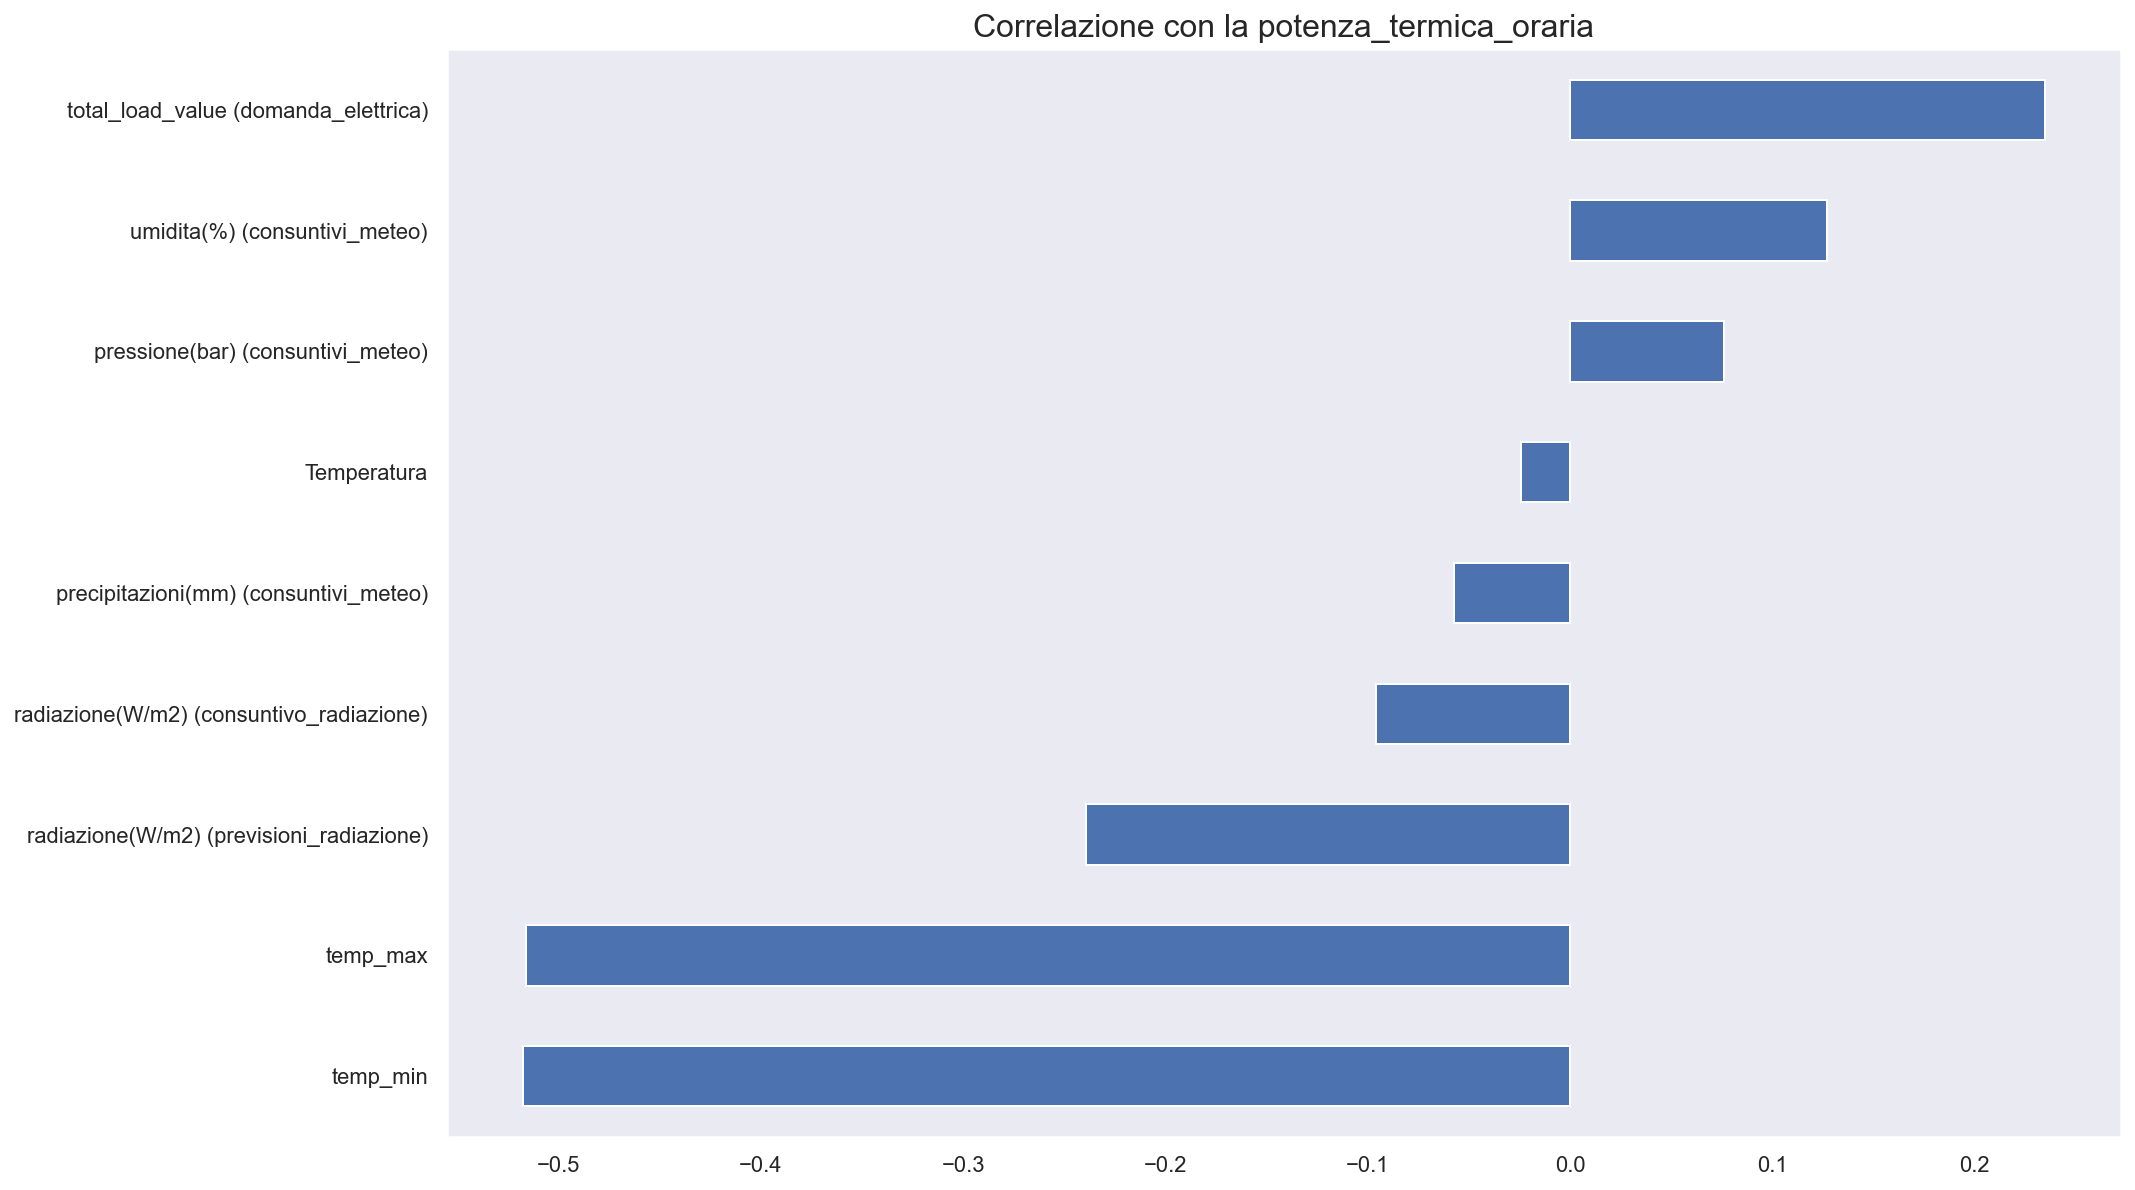

In [244]:
df_merge.corr()["ET_rete (potenza_termica_oraria)"].sort_values()[:-1].plot(kind='barh')

plt.title("Correlazione con la potenza_termica_oraria", fontsize=16)
plt.grid()
plt.show()

<AxesSubplot:>

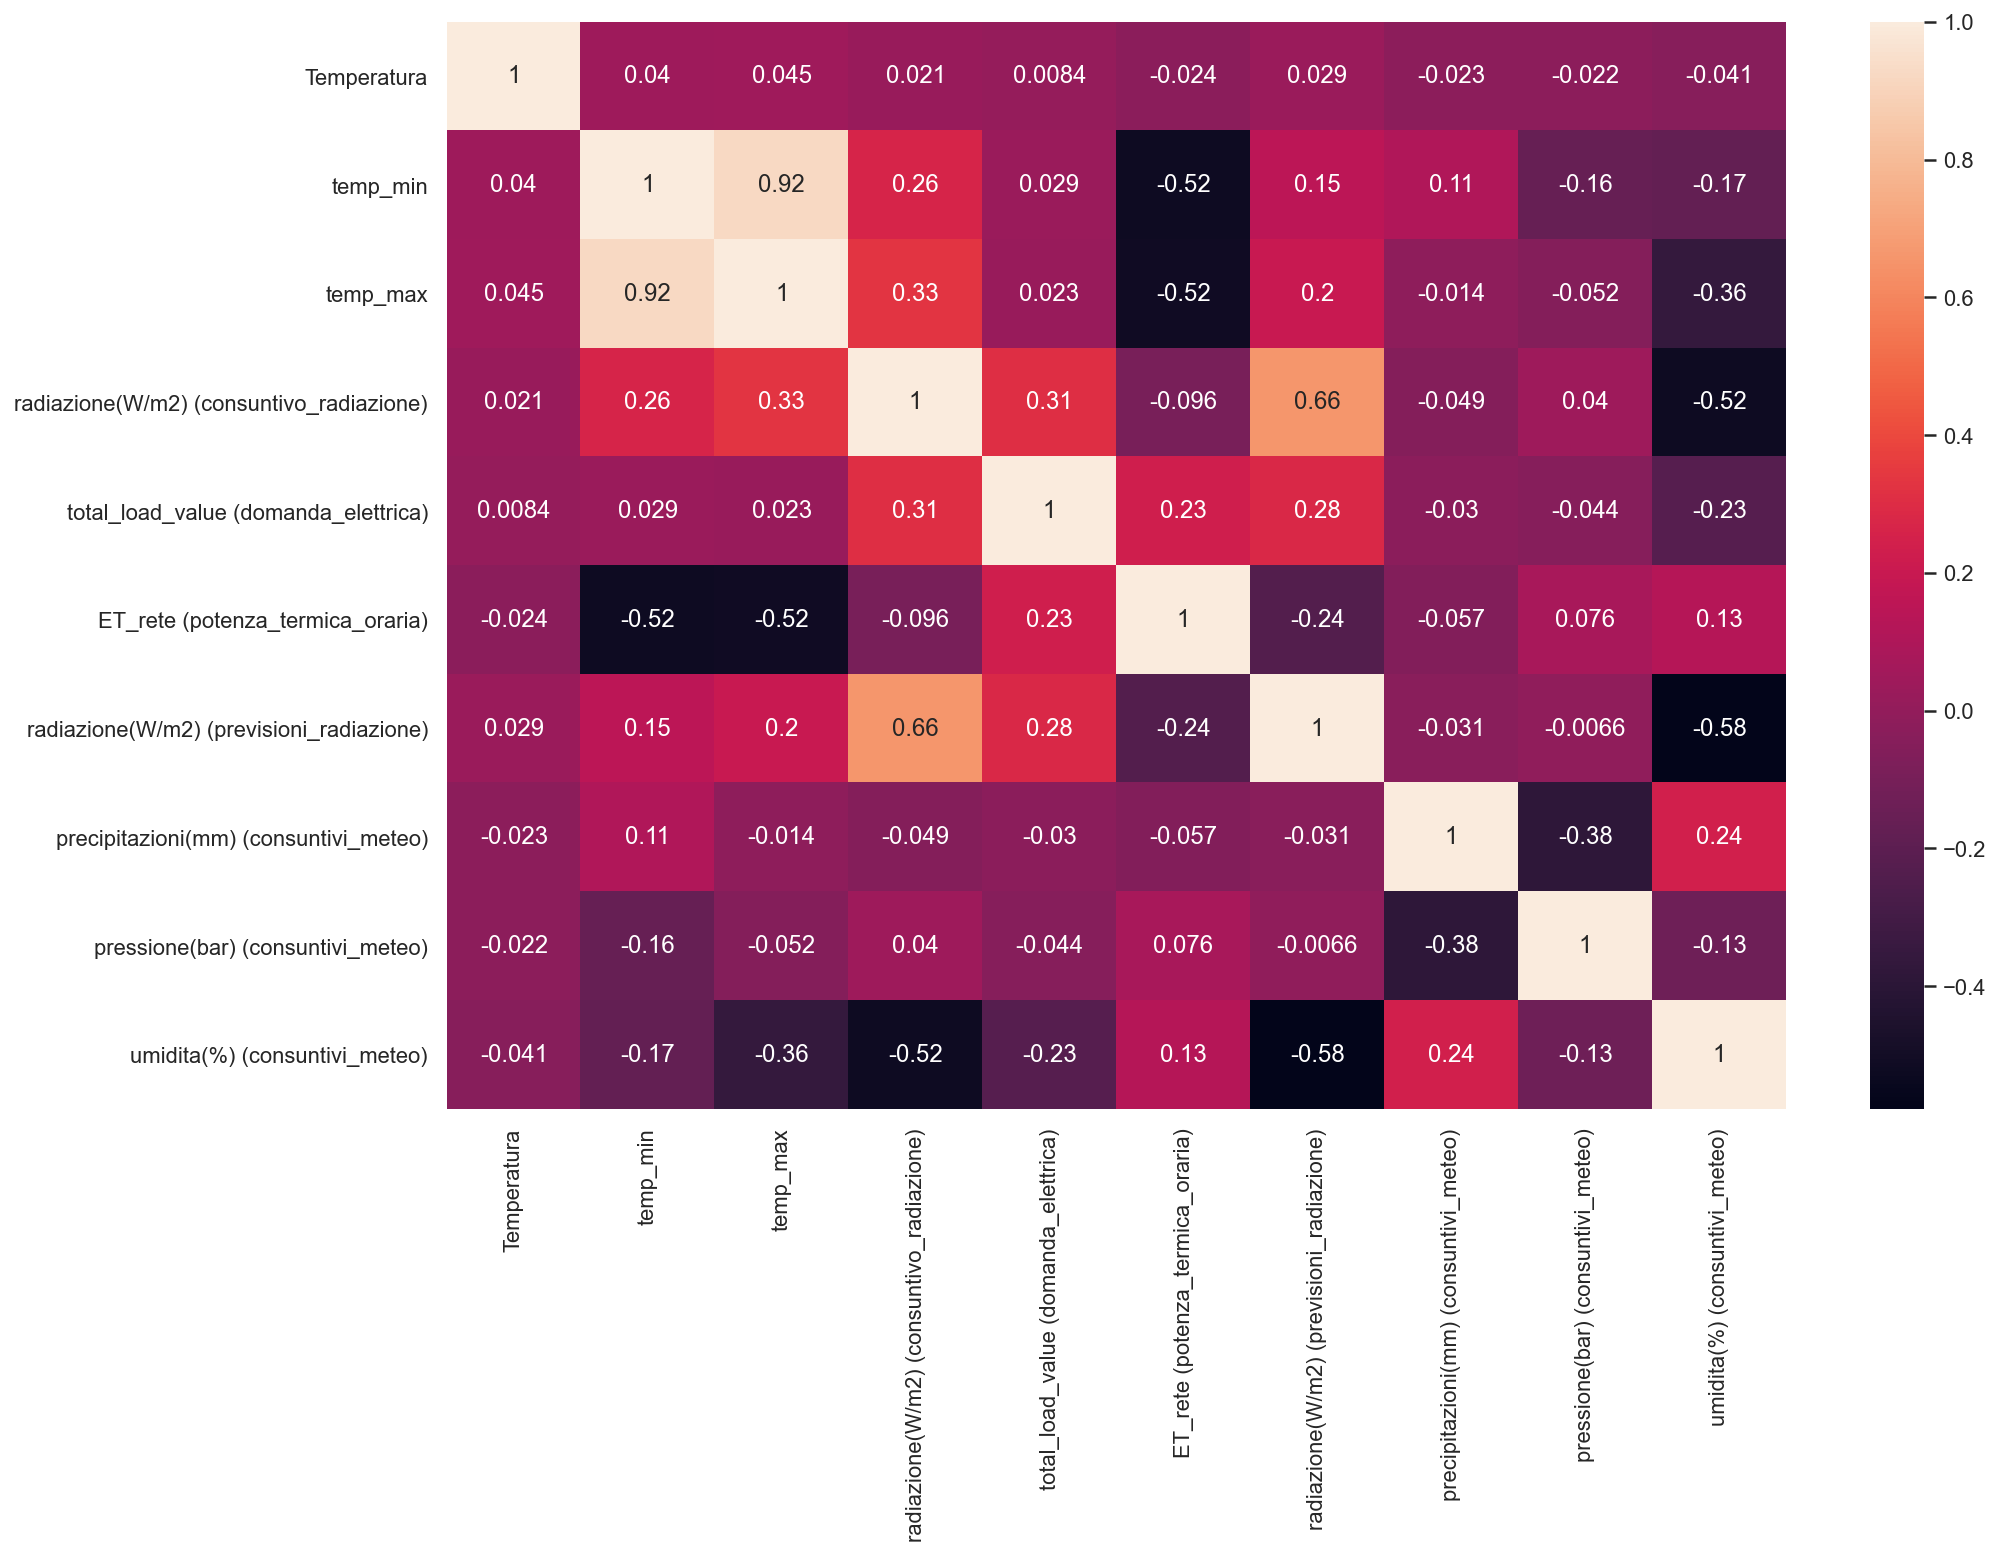

In [246]:
sns.heatmap(df_merge.corr(), annot=True)

In [252]:
df_merge[["temp_min", "temp_max"]]

temp_min  temp_max
2014-01-01 00:00:00       1.0       7.0
2014-01-01 01:00:00       1.0       7.0
2014-01-01 02:00:00       1.0       7.0
2014-01-01 03:00:00       1.0       7.0
2014-01-01 04:00:00       1.0       7.0
...                       ...       ...
2021-12-05 19:00:00       NaN       NaN
2021-12-05 20:00:00       NaN       NaN
2021-12-05 21:00:00       NaN       NaN
2021-12-05 22:00:00       NaN       NaN
2021-12-05 23:00:00       NaN       NaN

[69504 rows x 2 columns]

In [253]:
df_merge["temp_media"] = df_merge[["temp_min", "temp_max"]].sum(axis=1)/2

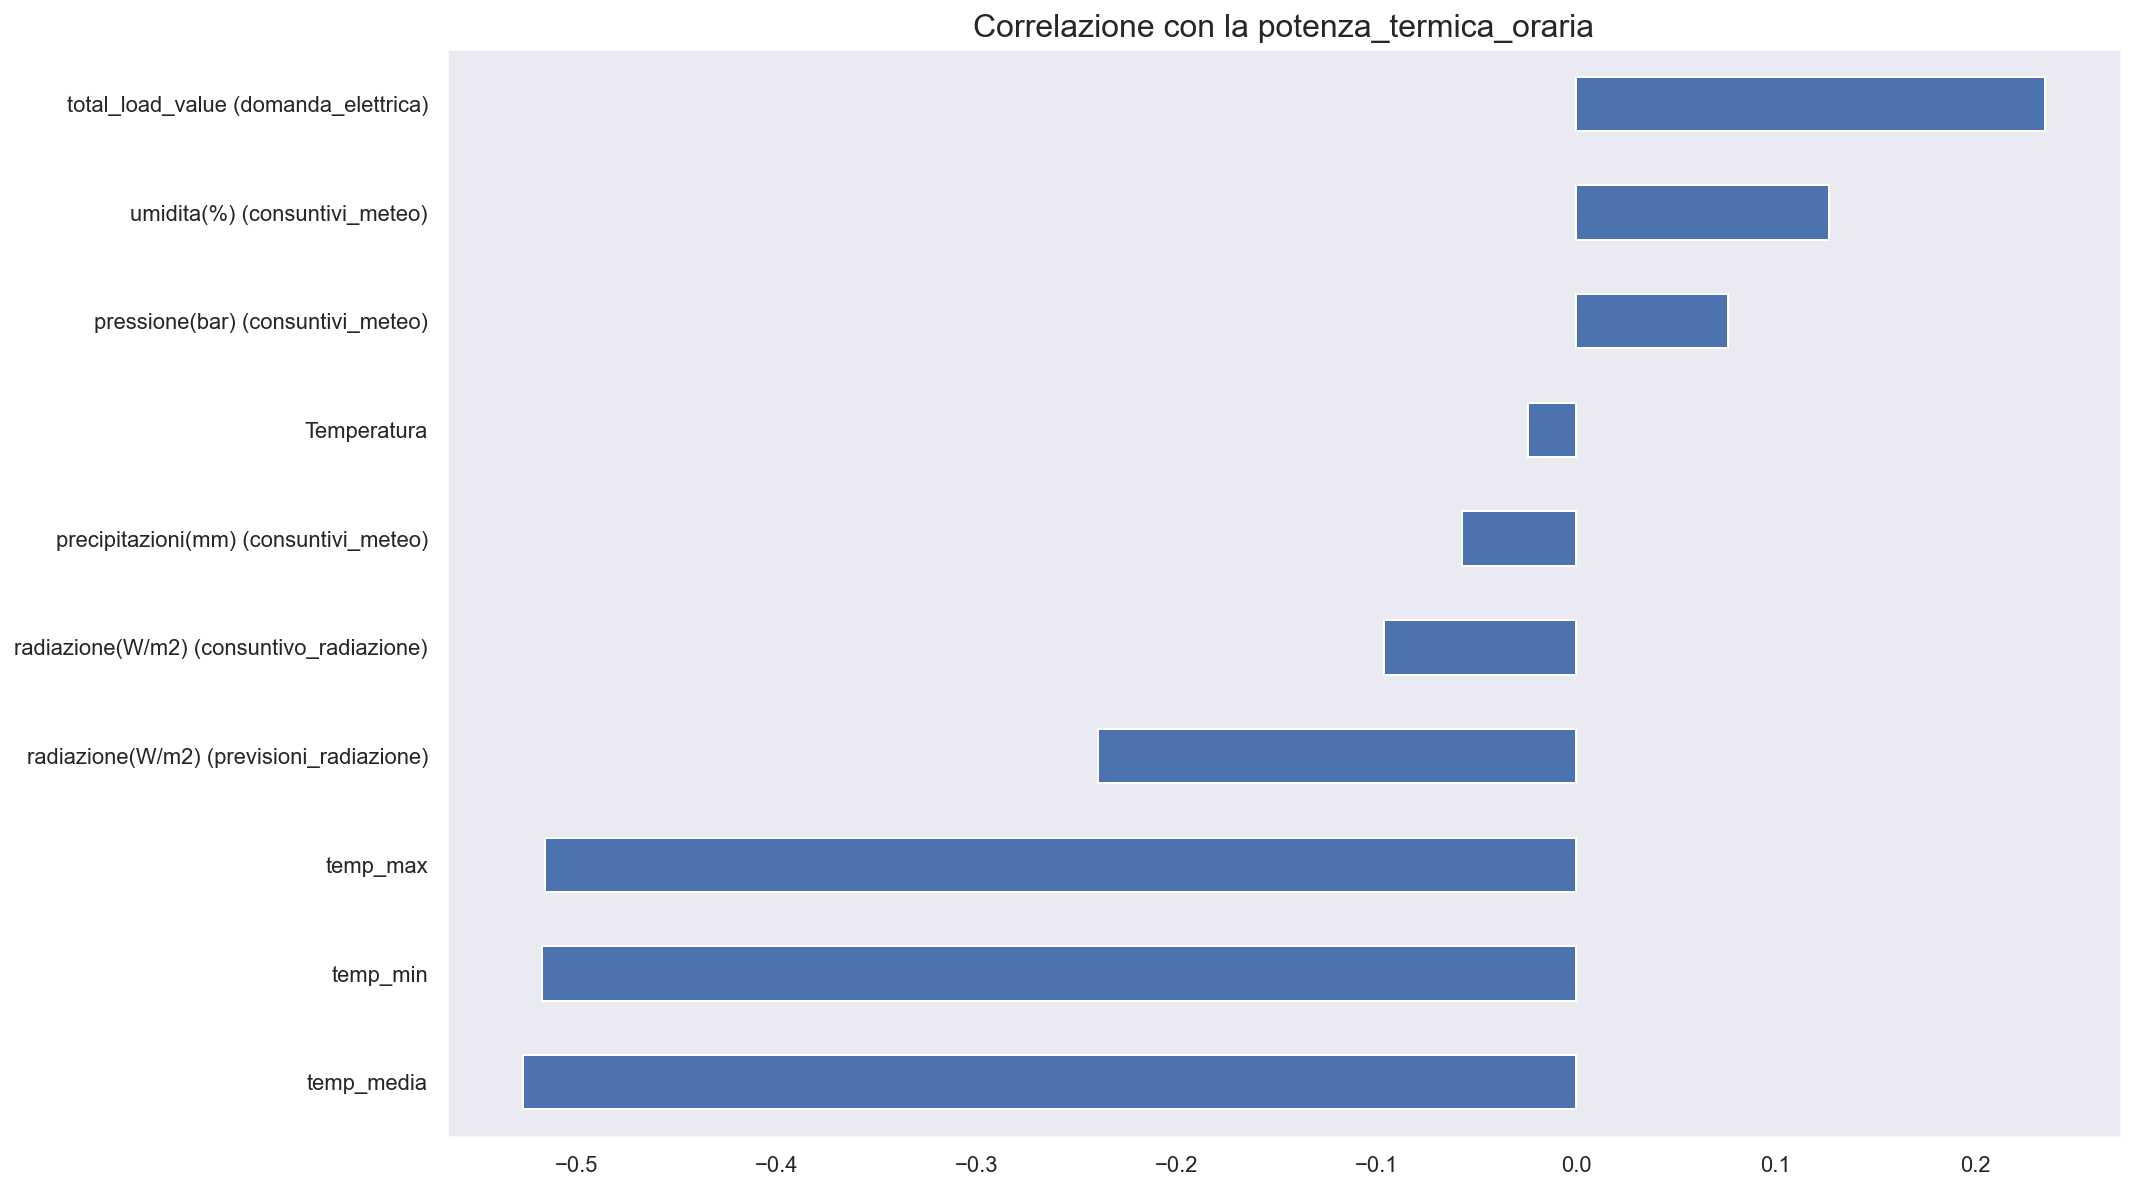

In [255]:
df_merge.corr()["ET_rete (potenza_termica_oraria)"].sort_values()[:-1].plot(kind='barh')

plt.title("Correlazione con la potenza_termica_oraria", fontsize=16)
plt.grid()
plt.show()

<AxesSubplot:>

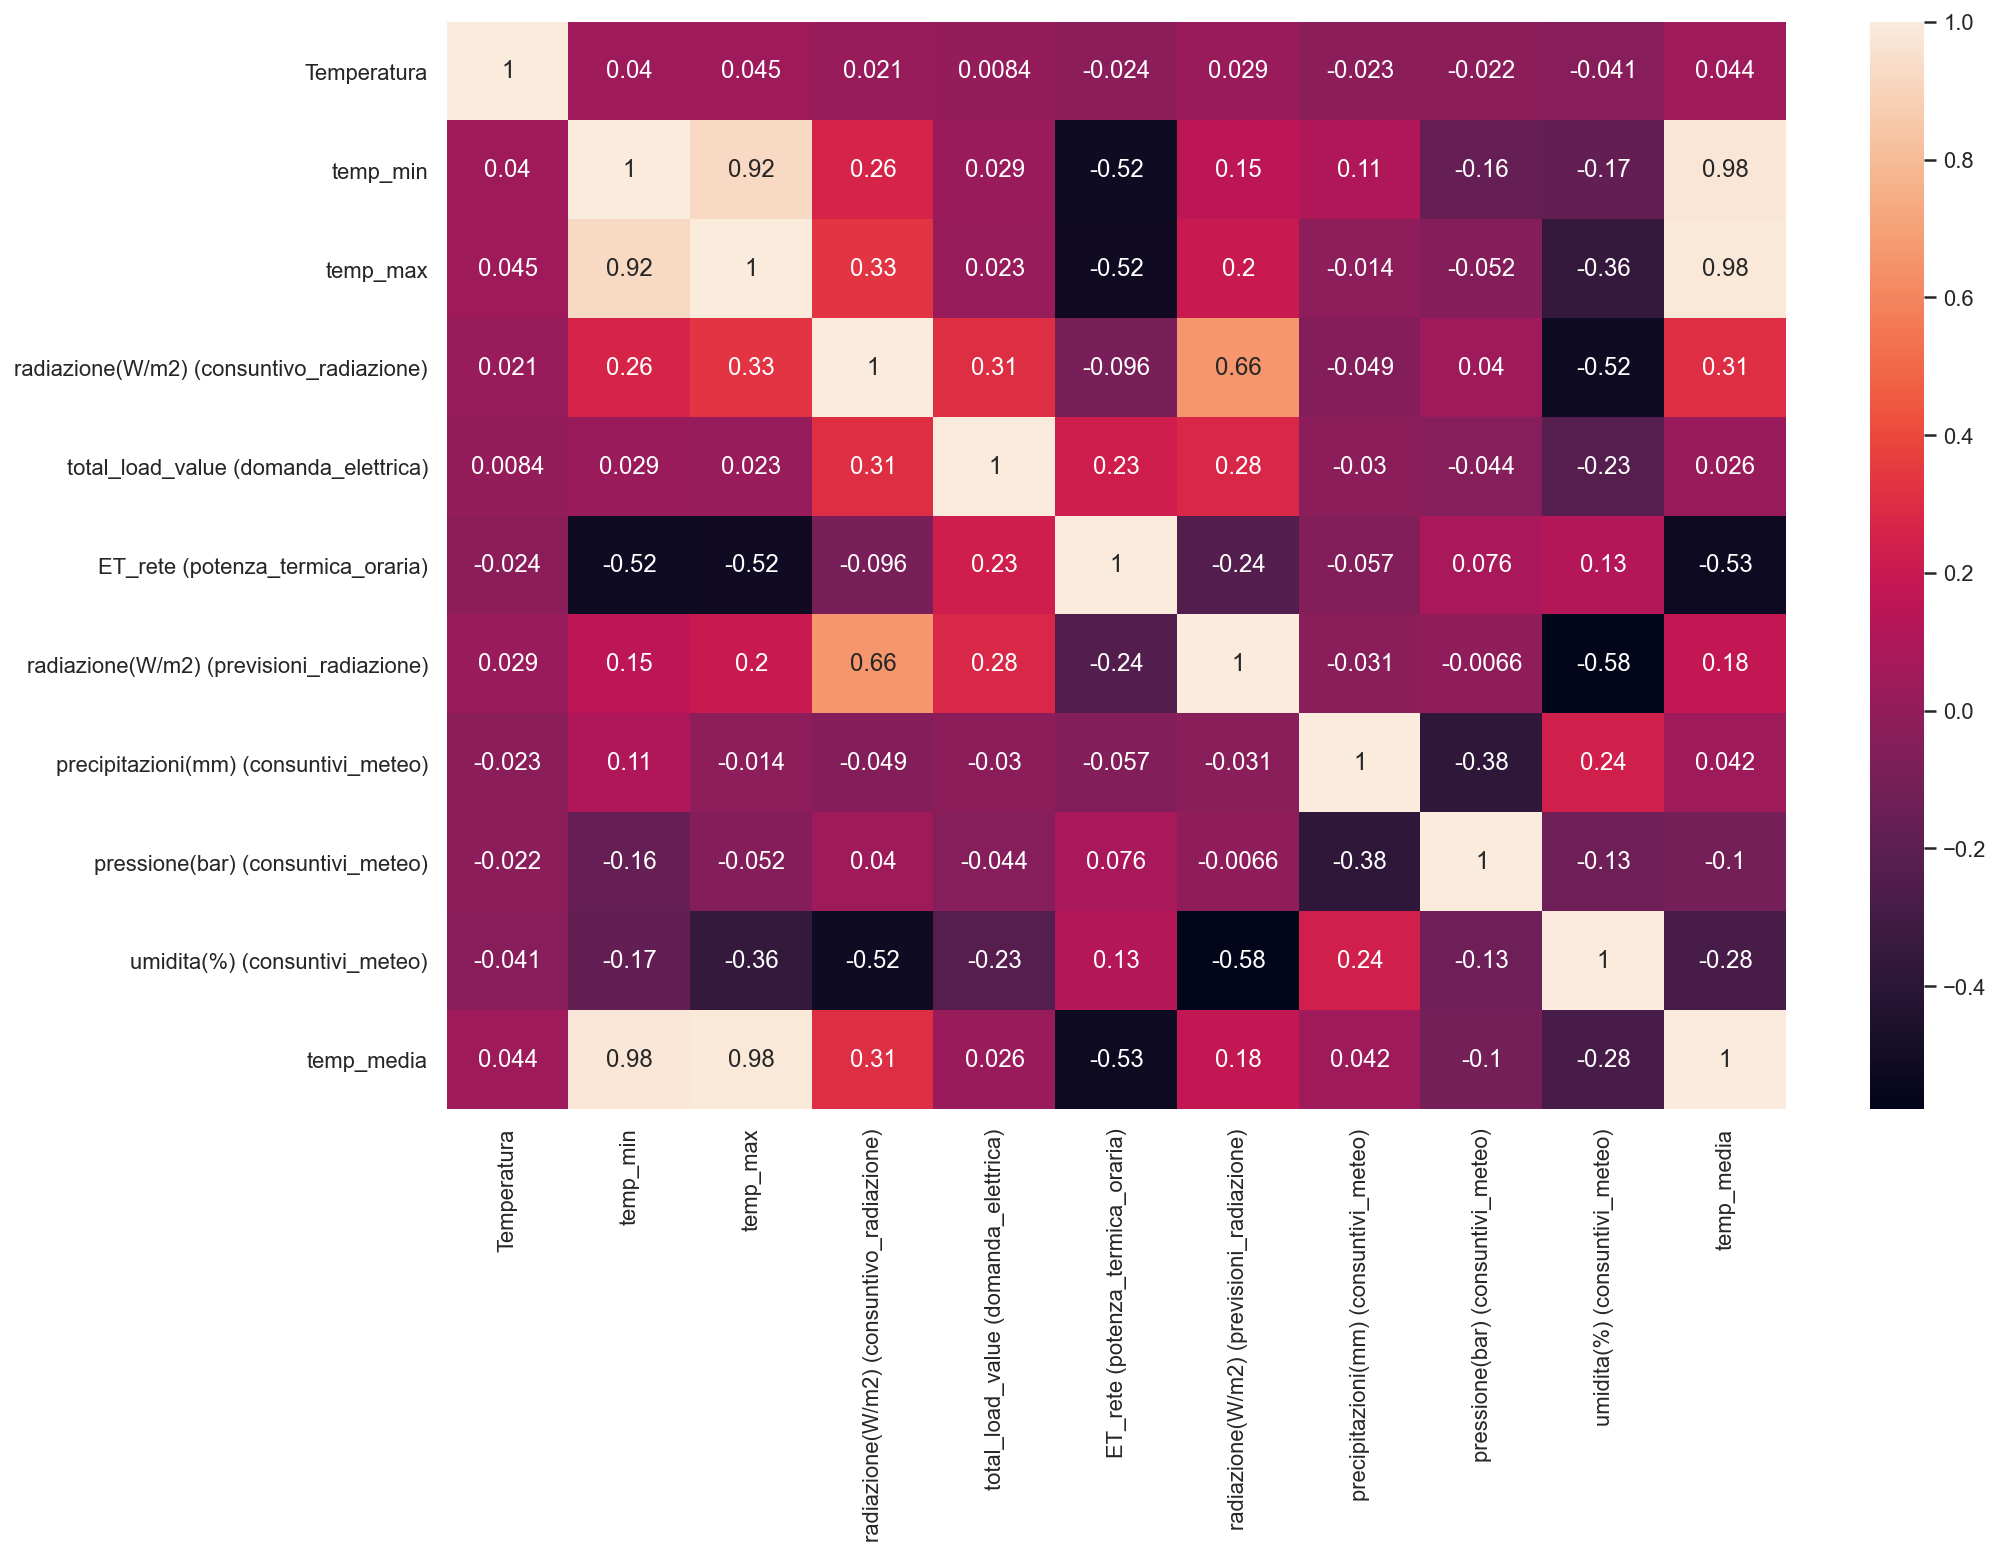

In [257]:
sns.heatmap(df_merge.corr(), annot=True)

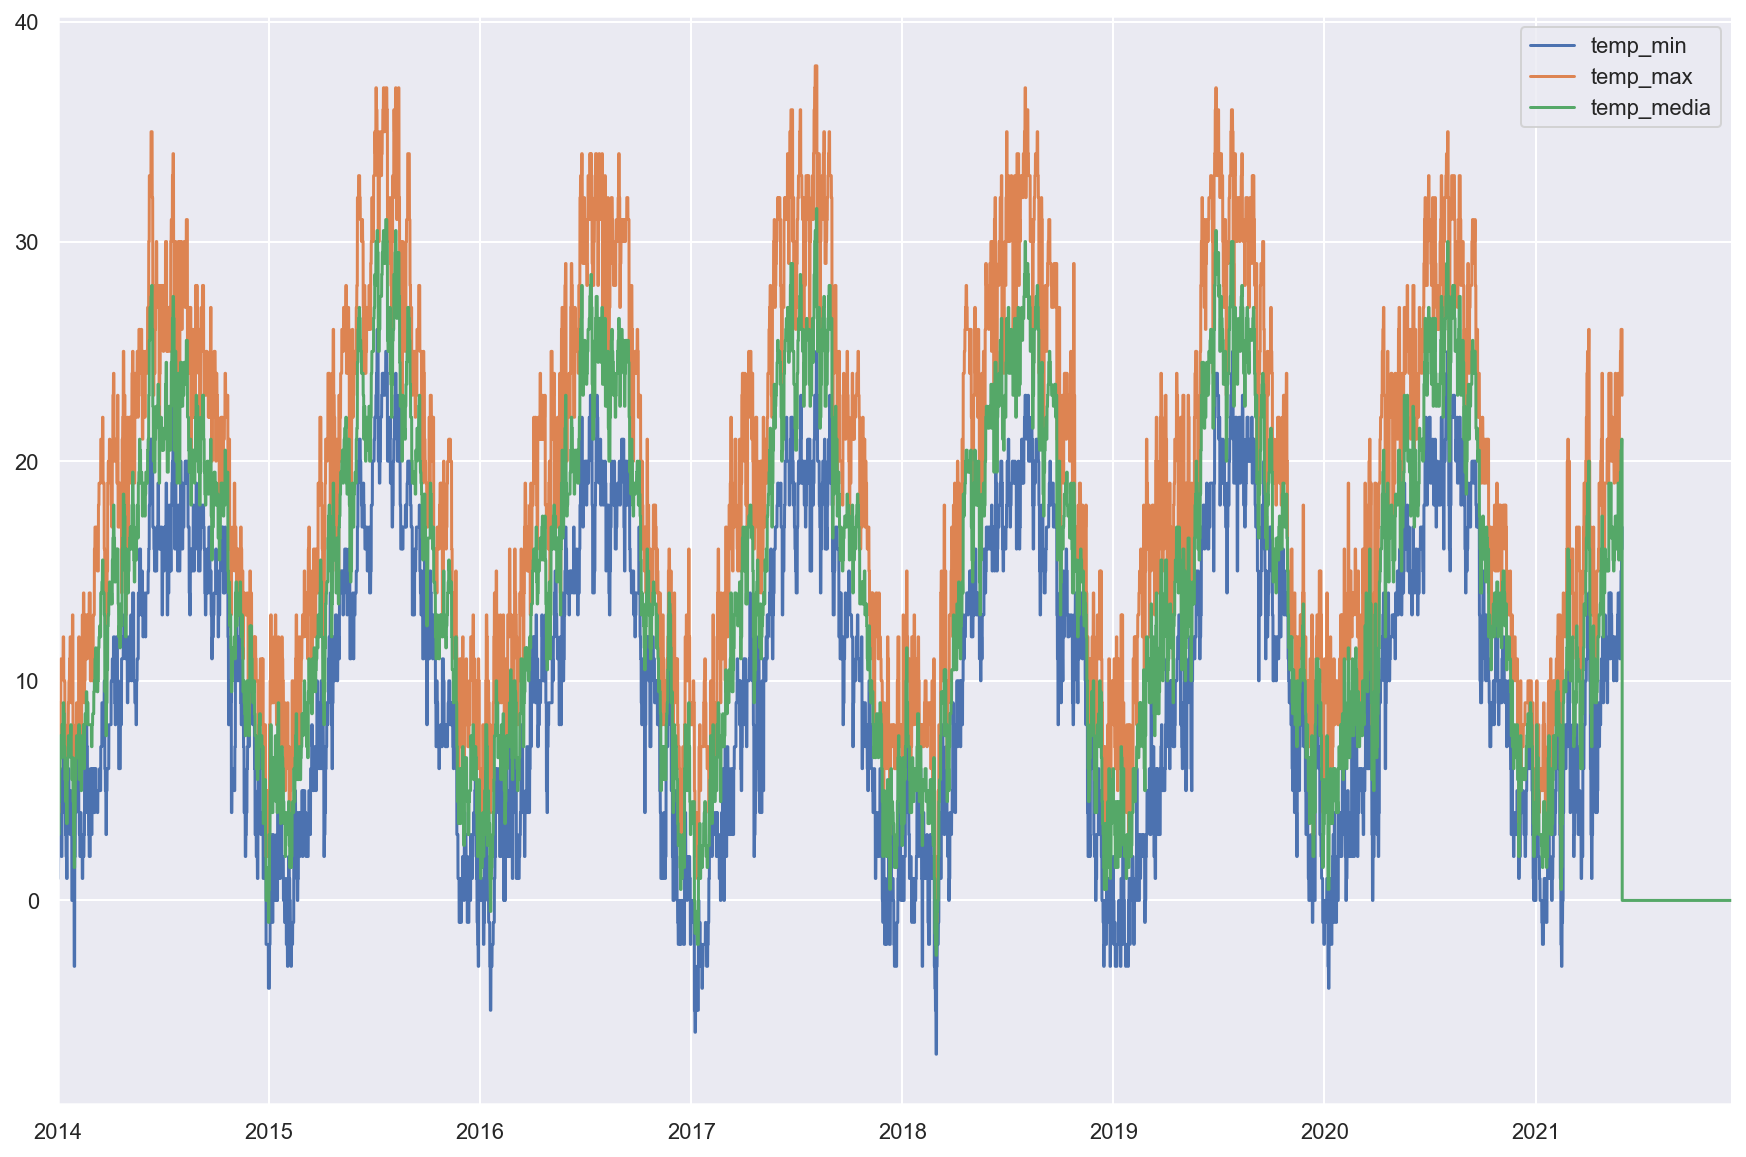

In [264]:
ax = df_merge[["temp_min", "temp_max"]].plot()
df_merge[["temp_media"]].plot(ax=ax)
plt.show()

<AxesSubplot:>

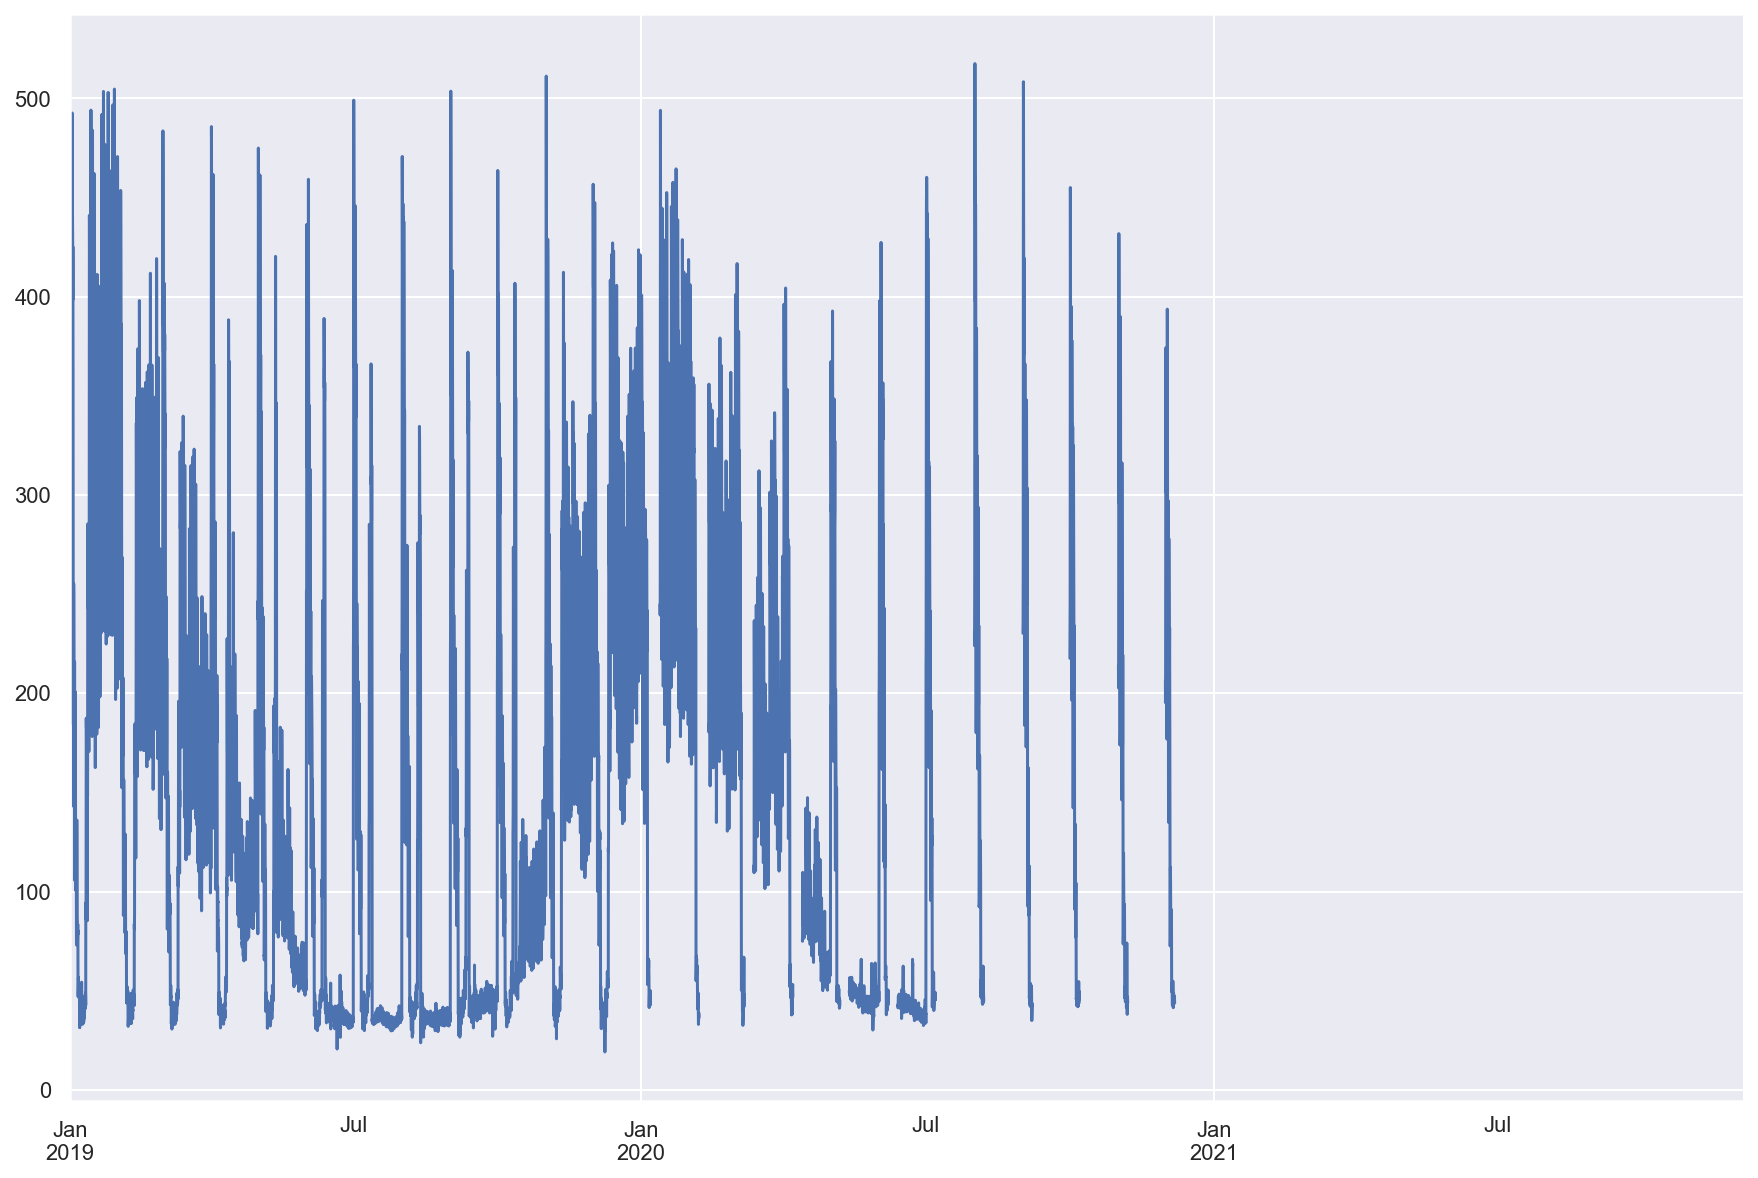

In [271]:
df_merge["ET_rete (potenza_termica_oraria)"].loc["2019":].plot()